# Assignment 1

The goal of the assignment is to perform an intensive visual analysis of a real-life dataset and to find a good feature representation for the data.

The original problem statement was to build an algorithm to classify time series into one of two classes. The data sets contain approximately 5000 of time series (the size of the training subsample is 1320). Each series consists of values for 500 time points and belongs to class {-1} or {1} (see column Target). 

Data files can be found here.

1. Load train and test data using pandas or numpy. 2 points.
2. Plot & analyze several training examples of each class using plt.plot (from matplotlib import pyplot as plt). 3 points.
3. Propose several features potentially useful for classification (for example, the maximal absolute value of a time series). 5 points. 
4. Calculate the proposed features using numpy and visualize (Links to an external site.)Links to an external site. the new representation of training examples (hint: ideally you will find a set of features with a small overlap between classes -1 and 1). 7 points.
5. Repeat steps 3-4 if needed.
6. Propose a simple decision rule using the proposed features (e.g. if feature_1 > 1 and feature_2 < 5 than class=-1). Estimate accuracy of classification using the test set. 3 points.

The solutions should be prepared as Jupyter notebooks.

## Load train and test data (1 step)

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('hw1_train.csv')
test = pd.read_csv('hw1_test.csv')

In [6]:
train.head(5)

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-1,-0.14040,0.17164,0.30204,0.23280,0.033853,-0.22418,-0.46999,-0.645400,-0.61770,...,-0.31997,0.39090,0.97483,1.258700,1.14330,0.64709,-0.049582,-0.690400,-0.97660,-0.79426
1,-1,0.33404,0.32225,0.45384,0.67185,0.887900,1.02050,1.05980,1.030300,0.95075,...,0.43519,-0.34650,-0.92491,-1.208700,-1.24800,-1.14000,-1.041800,-1.041800,-1.15960,-1.37570
2,-1,0.71669,0.74437,0.72591,0.66133,0.555220,0.41359,0.24658,0.065273,-0.12111,...,3.17100,2.27600,1.21950,0.081881,-1.05030,-2.09290,-2.983300,-3.675300,-4.13660,-4.33960
3,1,1.24030,1.33120,1.38660,1.38320,1.306000,1.14280,0.87861,0.532290,0.14002,...,-0.82026,-1.12460,-1.30200,-1.340600,-1.27140,-1.14640,-1.011300,-0.931220,-0.93450,-1.00130
4,-1,-1.15950,-1.20420,-1.16760,-1.03350,-0.818170,-0.55812,-0.29929,-0.093691,0.02277,...,0.66085,0.44144,0.20618,-0.006941,-0.14692,-0.18308,-0.112380,0.008987,0.13141,0.18627


In [7]:
test.head(5)

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-1,-0.79717,-0.664390,-0.37301,0.040815,0.52694,0.98429,1.3531,1.5781,1.6593,...,1.12080,0.722420,0.36207,0.092083,-0.081268,-0.21257,-0.39146,-0.66439,-1.073800,-1.56430
1,1,0.80485,0.634630,0.37347,0.038343,-0.34099,-0.74086,-1.1097,-1.3954,-1.5702,...,0.38640,0.049213,-0.25814,-0.510580,-0.683650,-0.77382,-0.78525,-0.71489,-0.560440,-0.31909
2,-1,0.72799,0.111280,-0.49912,-1.068600,-1.57840,-1.99050,-2.3020,-2.5034,-2.5852,...,0.39446,0.463680,0.50773,0.517170,0.504590,0.47627,0.43851,0.39446,0.339400,0.25539
3,-1,-0.23444,-0.502160,-0.73249,-0.946130,-1.13970,-1.32330,-1.4902,-1.6071,-1.6204,...,-0.95280,-0.929440,-0.92276,-0.929440,-0.909410,-0.83597,-0.69577,-0.47879,-0.188710,0.11974
4,-1,-0.17133,-0.062285,0.23583,0.710400,1.24000,1.64980,1.8763,1.8655,1.7038,...,0.77619,0.725500,0.69745,0.731970,0.808540,0.83982,0.73305,0.43752,-0.026585,-0.60221


## Plotting, analysing... (2 step)

In [11]:
train.columns

Index(['Target', 'Time-0', 'Time-1', 'Time-2', 'Time-3', 'Time-4', 'Time-5',
       'Time-6', 'Time-7', 'Time-8',
       ...
       'Time-490', 'Time-491', 'Time-492', 'Time-493', 'Time-494', 'Time-495',
       'Time-496', 'Time-497', 'Time-498', 'Time-499'],
      dtype='object', length=501)

In [12]:
test.columns

Index(['Target', 'Time-0', 'Time-1', 'Time-2', 'Time-3', 'Time-4', 'Time-5',
       'Time-6', 'Time-7', 'Time-8',
       ...
       'Time-490', 'Time-491', 'Time-492', 'Time-493', 'Time-494', 'Time-495',
       'Time-496', 'Time-497', 'Time-498', 'Time-499'],
      dtype='object', length=501)

In [50]:
train.describe()

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,...,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,-0.031818,0.056002,0.049911,0.038883,0.024069,0.007442,-0.008919,-0.023496,-0.033576,-0.038521,...,-0.021316,-0.020575,-0.021015,-0.022639,-0.024066,-0.024627,-0.023276,-0.019195,-0.012906,-0.004523
std,0.999872,1.030456,1.027541,1.031559,1.037225,1.040995,1.041183,1.039772,1.037451,1.032377,...,0.997735,0.998892,1.003872,1.005504,1.001538,0.995778,0.995949,1.006262,1.021453,1.034001
min,-1.000000,-3.295300,-3.114200,-3.143400,-3.210100,-3.488700,-3.297400,-3.530600,-3.614100,-3.499100,...,-3.191000,-2.759400,-2.923200,-3.345700,-3.640700,-3.644500,-3.323400,-3.675300,-4.136600,-4.339600
25%,-1.000000,-0.615185,-0.622537,-0.647920,-0.703828,-0.710407,-0.704155,-0.701902,-0.726530,-0.725650,...,-0.659485,-0.667103,-0.675030,-0.701325,-0.666675,-0.639500,-0.675743,-0.684493,-0.703070,-0.668713
50%,-1.000000,0.060756,0.063215,0.072927,0.046644,-0.001561,-0.033439,-0.069241,-0.038386,-0.039849,...,-0.034602,-0.025947,-0.018704,-0.023849,-0.047471,-0.059076,-0.055776,-0.062619,-0.038624,-0.010347
75%,1.000000,0.725193,0.683445,0.708508,0.721960,0.711718,0.667813,0.662852,0.670717,0.656107,...,0.636785,0.645740,0.627622,0.626095,0.627945,0.618563,0.635045,0.610607,0.618785,0.642832
max,1.000000,3.972300,3.854800,3.500800,3.425200,3.603900,3.498300,3.202600,3.149200,3.149300,...,3.171000,3.038900,3.307500,3.440600,3.372700,3.878000,4.130700,4.099100,3.791200,3.696600


In [9]:
test.describe()

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
count,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,...,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000
mean,-0.025271,-0.016708,-0.015270,-0.013605,-0.011943,-0.009966,-0.007062,-0.003495,0.000568,0.005354,...,0.008724,0.006896,0.004053,0.000929,-0.001922,-0.003369,-0.003237,-0.001820,0.000031,0.001394
std,0.999819,1.058456,1.051904,1.044560,1.042573,1.046933,1.052830,1.055439,1.054305,1.050425,...,1.037718,1.040631,1.040826,1.036657,1.028358,1.018718,1.011871,1.012366,1.020914,1.032490
min,-1.000000,-3.933500,-3.656900,-3.479500,-3.595400,-3.773900,-3.914700,-3.855300,-4.497400,-4.552600,...,-4.402100,-4.073000,-4.014400,-3.817000,-3.574300,-3.746400,-3.680800,-3.904600,-4.221600,-4.076000
25%,-1.000000,-0.685690,-0.699530,-0.688300,-0.709730,-0.694990,-0.691040,-0.690320,-0.701240,-0.675090,...,-0.664480,-0.690140,-0.688230,-0.677700,-0.674280,-0.655950,-0.657260,-0.664390,-0.659580,-0.675840
50%,-1.000000,-0.007573,-0.003044,-0.003066,0.008598,0.001042,0.000280,-0.011988,-0.026672,-0.002031,...,-0.001031,0.012348,0.003914,0.005957,-0.002728,-0.010841,-0.008002,-0.004802,-0.013723,-0.003186
75%,1.000000,0.660360,0.674900,0.683700,0.679470,0.697530,0.688800,0.721440,0.705020,0.692260,...,0.696860,0.714820,0.707360,0.692840,0.666430,0.668460,0.671540,0.677350,0.684050,0.682920
max,1.000000,3.503900,3.369300,3.498300,3.493800,3.293300,3.605600,3.895900,3.741000,3.630900,...,3.971900,3.522200,3.842700,3.916700,3.670100,3.567900,3.471800,3.798100,3.863300,4.349700


In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [42]:
pos_samples = train[train['Target']==1]
neg_samples = train[train['Target']==-1]

In [21]:
pos_samples.shape

(639, 501)

Let's plot some samples for an each class

In [22]:
import random

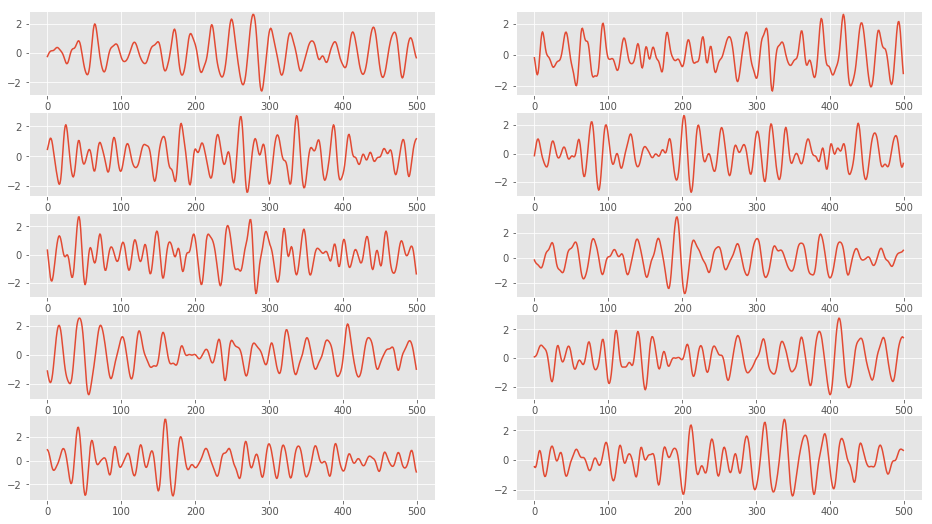

In [45]:
plt.figure(figsize=(16,9))
for idx in range(10):
    y = []
    for elem in pos_samples.iloc[random.randint(a=0,b=pos_samples.shape[0]-1)].drop('Target'):
        y.append(elem)
    plt.subplot(5,2,idx+1)
    plt.plot(y)
plt.show()

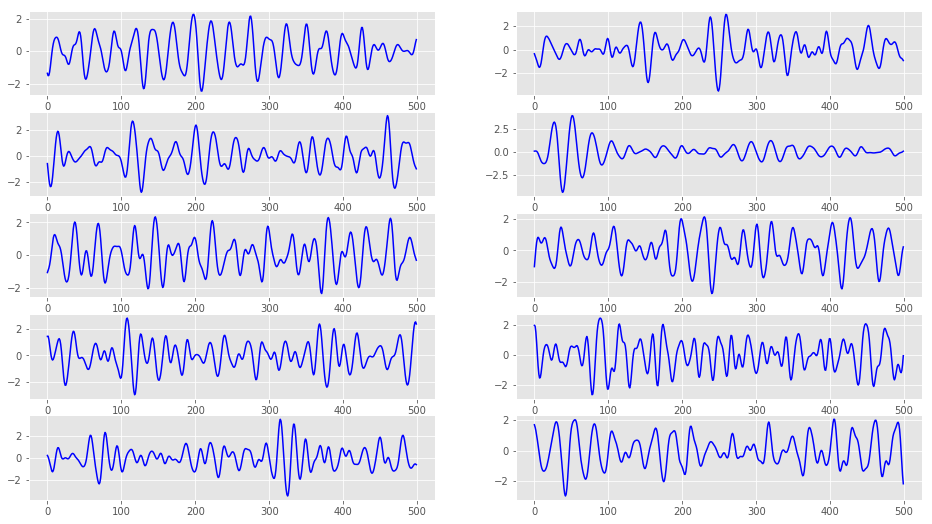

In [46]:
plt.figure(figsize=(16,9))
for idx in range(10):
    y = []
    for elem in pos_samples.iloc[random.randint(a=0,b=pos_samples.shape[0]-1)].drop('Target'):
        y.append(elem)
    plt.subplot(5,2,idx+1)
    plt.plot(y, 'b')
plt.show()

At this moment I'll not be able to distinguish these classes even if I use my eyes...

Let's plot mean series from both targets

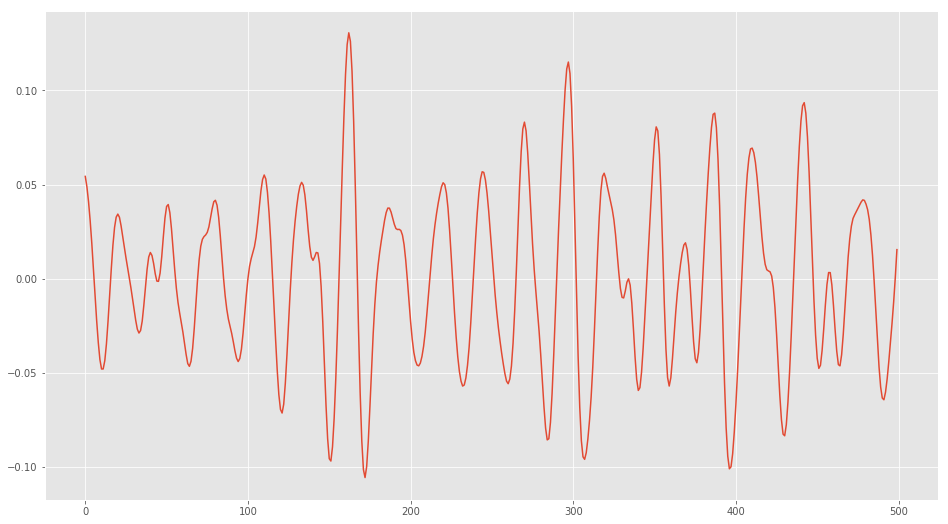

In [59]:
plt.figure(figsize=(16,9))
y_pos = []
for elem in pos_samples.describe().iloc[1][1:]:
    y_pos.append(elem)
plt.plot(y_pos)
plt.show()

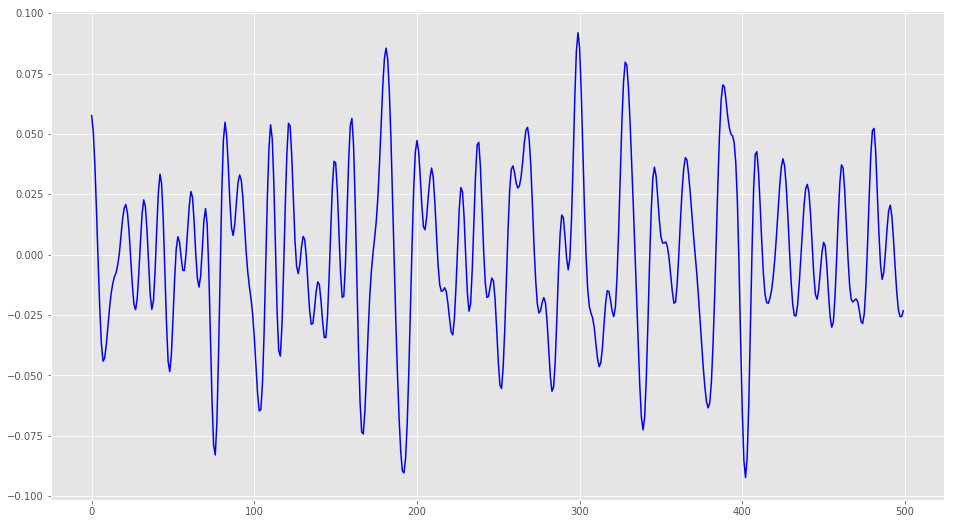

In [60]:
plt.figure(figsize=(16,9))
y_neg = []
for elem in neg_samples.describe().iloc[1][1:]:
    y_neg.append(elem)
plt.plot(y_neg, 'b')
plt.show()

We can see that negative class in general is more frequent than positive. 

Or maybe it's better to say that they have the same main frequency, but negative class also have some noise (see these broken peaks on the second picture)

You can also see them on the same plot

[]

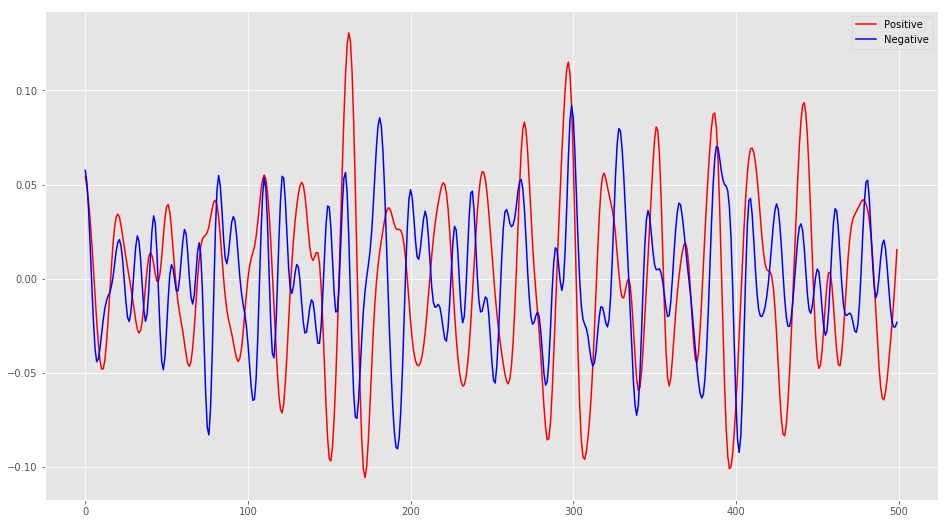

In [61]:
plt.figure(figsize=(16,9))
plt.plot(y_pos, 'r')
plt.plot(y_neg, 'b')
plt.legend(['Positive', 'Negative'])
plt.plot()

Let's make the same thing for the variance

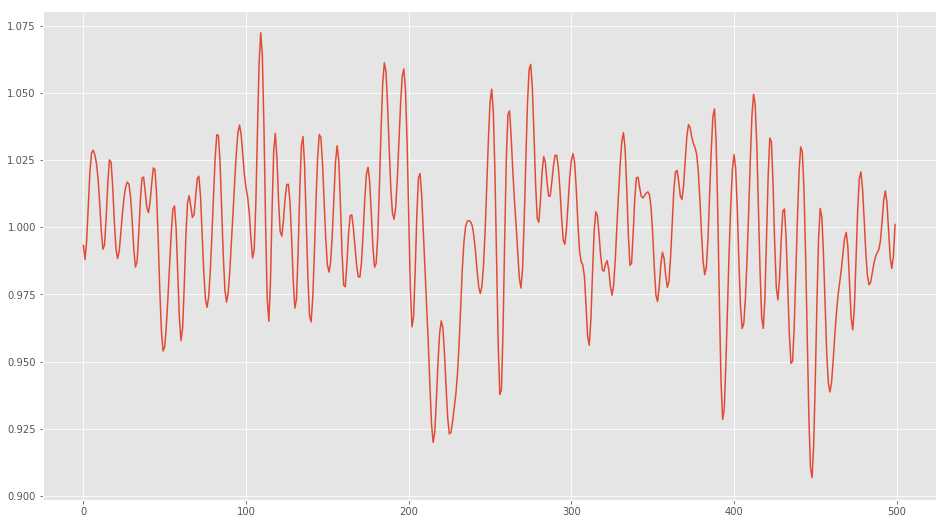

In [62]:
plt.figure(figsize=(16,9))
y_pos = []
for elem in pos_samples.describe().iloc[2][1:]:
    y_pos.append(elem)
plt.plot(y_pos)
plt.show()

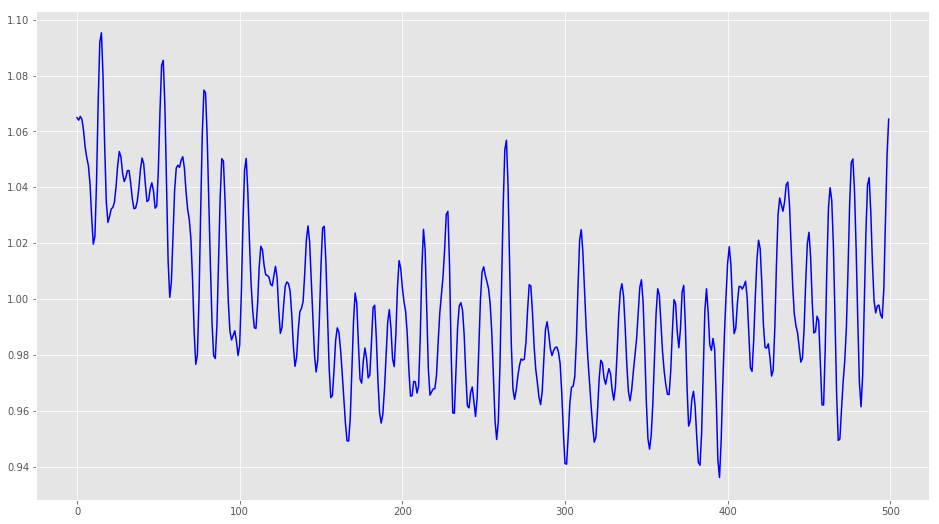

In [63]:
plt.figure(figsize=(16,9))
y_neg = []
for elem in neg_samples.describe().iloc[2][1:]:
    y_neg.append(elem)
plt.plot(y_neg, 'b')
plt.show()

[]

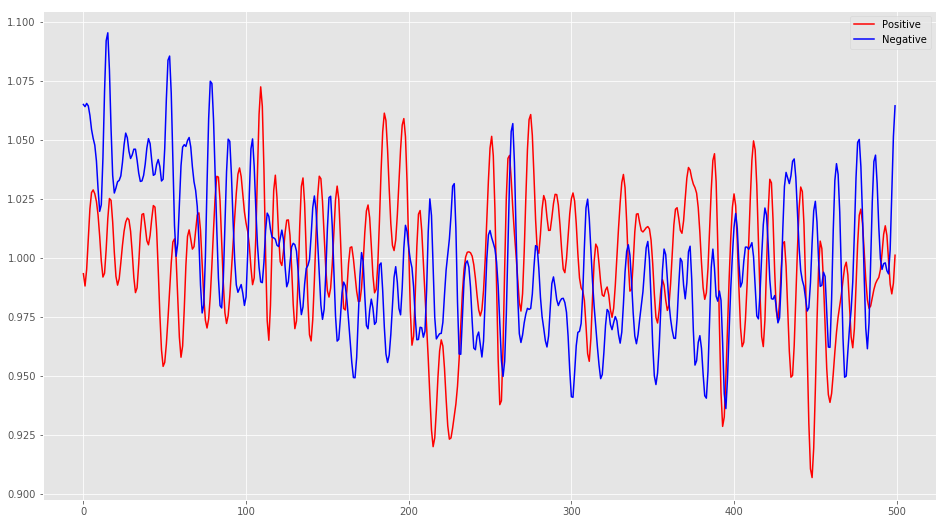

In [64]:
plt.figure(figsize=(16,9))
plt.plot(y_pos, 'r')
plt.plot(y_neg, 'b')
plt.legend(['Positive', 'Negative'])
plt.plot()

It seems like the negative class has a drawdown in the middle. Let's try to smooth these charts

[]

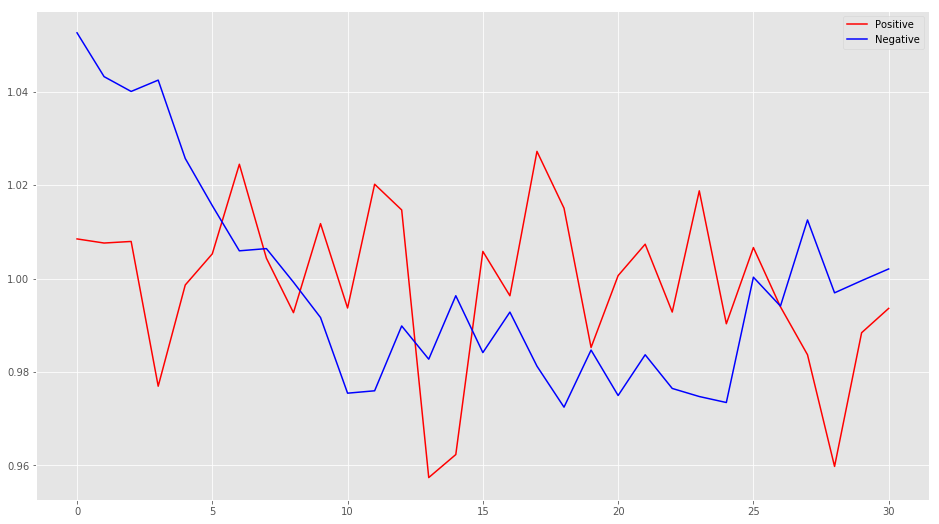

In [71]:
y_pos_smooth = []
window = 15
cnt = 0
idx = 0
for elem in y_pos:
    if cnt < window:
        try:
            y_pos_smooth[idx] += elem/window
        except Exception:
            y_pos_smooth.append(elem/window)
        cnt+=1
    else:
        idx+=1
        cnt=0
if cnt < window:
    y_pos_smooth = y_pos_smooth[:-1]
    
y_neg_smooth = []
cnt = 0
idx = 0
for elem in y_neg:
    if cnt < window:
        try:
            y_neg_smooth[idx] += elem/window
        except Exception:
            y_neg_smooth.append(elem/window)
        cnt+=1
    else:
        idx+=1
        cnt=0
if cnt < window:
    y_neg_smooth = y_neg_smooth[:-1]
    
plt.figure(figsize=(16,9))
plt.plot(y_pos_smooth, 'r')
plt.plot(y_neg_smooth, 'b')
plt.legend(['Positive', 'Negative'])
plt.plot()

We can see that there are exist some zones where something changes, maybe it's a good idea to find features in these 2 or 3 zones

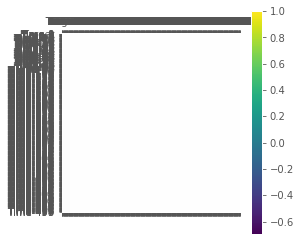

In [7]:
plt.matshow(train.corr(), fignum=10)
plt.xticks(range(len(train.columns)), train.columns)
plt.yticks(range(len(train.columns)), train.columns)
plt.colorbar()
plt.show()

## Proposing features... (3 step)

Let's try max/min features

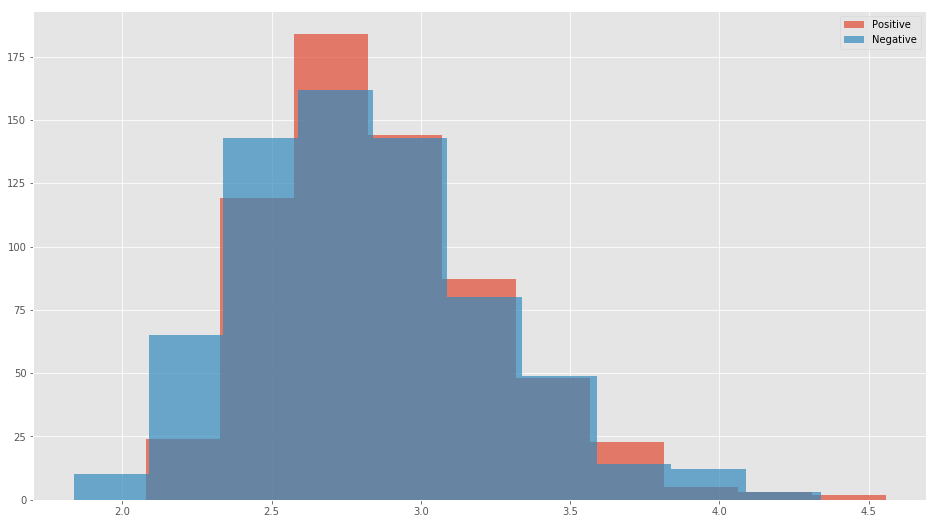

In [121]:
y_pos_max = []
for elem in pos_samples[list(set(pos_samples.columns) - set(['Target']))].abs().max(axis=1):
    y_pos_max.append(elem)

y_neg_max = []
for elem in neg_samples[list(set(neg_samples.columns) - set(['Target']))].abs().max(axis=1):
    y_neg_max.append(elem)

plt.figure(figsize=(16,9))
plt.hist(y_pos_max, alpha=0.7)
plt.hist(y_neg_max, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

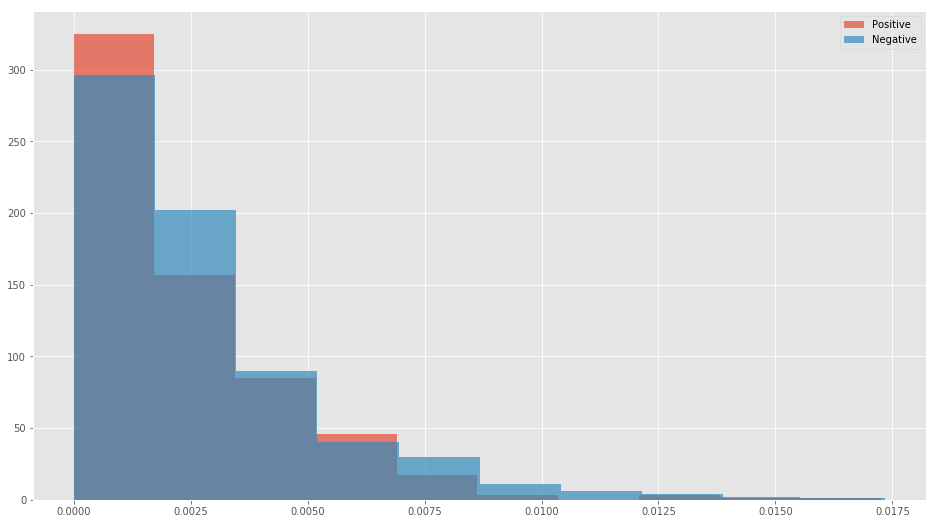

In [122]:
y_pos_min = []
for elem in pos_samples[list(set(pos_samples.columns) - set(['Target']))].abs().min(axis=1):
    y_pos_min.append(elem)

y_neg_min = []
for elem in neg_samples[list(set(neg_samples.columns) - set(['Target']))].abs().min(axis=1):
    y_neg_min.append(elem)

plt.figure(figsize=(16,9))
plt.hist(y_pos_min, alpha=0.7)
plt.hist(y_neg_min, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

We can see that it's not very good feautures

Let's try to use the insight from the last part of plotting.

We'll use the window of size 15 and will calculate some parameters on the 0-10, 10-24, 24-last frames

In [125]:
window = 15
y_pos_by_sample = []
for idx in range(pos_samples.shape[0]):
    sample = pos_samples.iloc[idx]
    sample = sample.drop('Target')
    cnt = 0
    j = 0
    for elem in sample:
        y_pos_by_sample.append([])
        if cnt < window:
            try:
                y_pos_by_sample[idx][j] += elem/window
            except Exception:
                y_pos_by_sample[idx].append(elem/window)
            cnt+=1
        else:
            j+=1
            cnt=0
            
if cnt < window:
    y_pos_by_sample = y_pos_by_sample[:-1]

statistics_by_pos_sample = []
for sample_arr in y_pos_by_sample:
    stats = {}
    
    if len(sample_arr) > 0:
        stats['delta_0_10'] = abs(sample_arr[0] - sample_arr[10])
        stats['delta_10_24'] = abs(sample_arr[10] - sample_arr[24])
        stats['delta_24_last'] = abs(sample_arr[24] - sample_arr[-1])
        statistics_by_pos_sample.append(stats)
    

In [126]:
window = 15
y_neg_by_sample = []
for idx in range(neg_samples.shape[0]):
    sample = neg_samples.iloc[idx]
    sample = sample.drop('Target')
    cnt = 0
    j = 0
    for elem in sample:
        y_neg_by_sample.append([])
        if cnt < window:
            try:
                y_neg_by_sample[idx][j] += elem/window
            except Exception:
                y_neg_by_sample[idx].append(elem/window)
            cnt+=1
        else:
            j+=1
            cnt=0
            
if cnt < window:
    y_neg_by_sample = y_neg_by_sample[:-1]

statistics_by_neg_sample = []
for sample_arr in y_neg_by_sample:
    stats = {}
    
    if len(sample_arr) > 0:
        stats['delta_0_10'] = abs(sample_arr[0] - sample_arr[10])
        stats['delta_10_24'] = abs(sample_arr[10] - sample_arr[24])
        stats['delta_24_last'] = abs(sample_arr[24] - sample_arr[-1]) 
        statistics_by_neg_sample.append(stats)

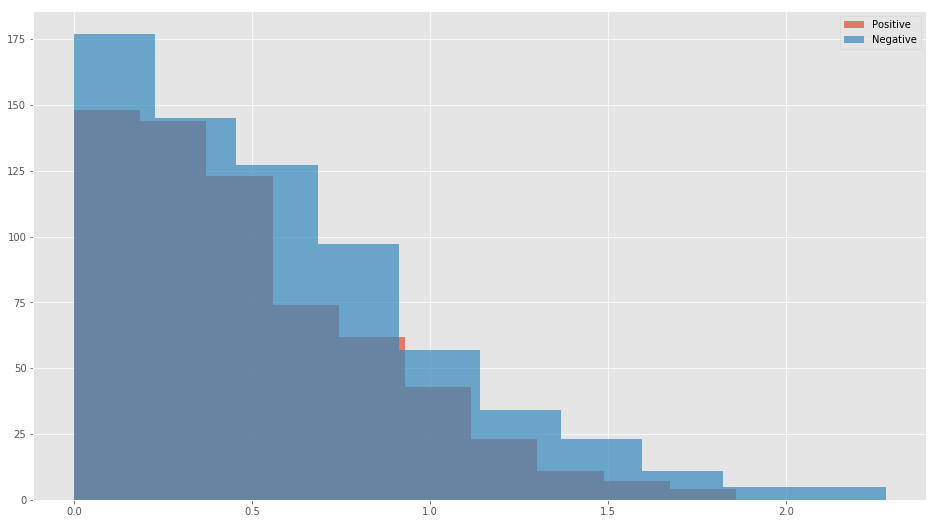

In [127]:
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(elem['delta_0_10'])

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(elem['delta_0_10'])

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

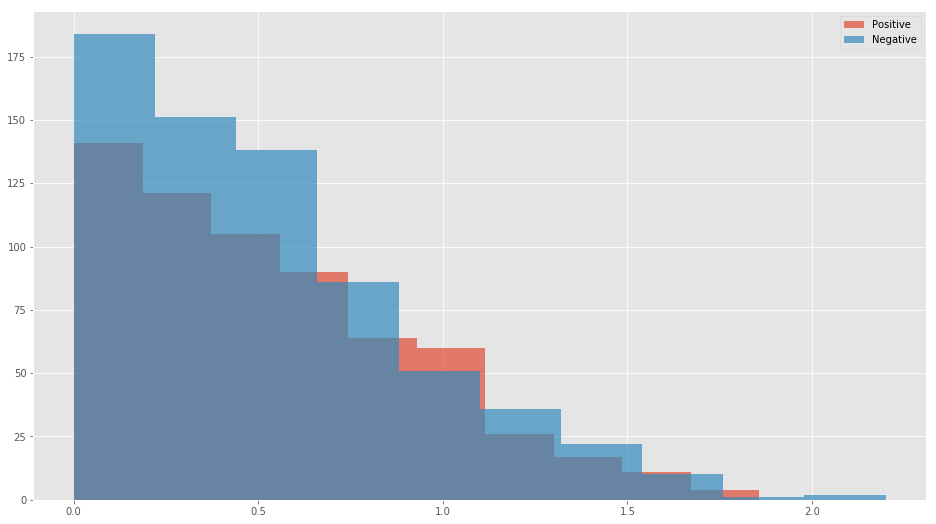

In [128]:
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(elem['delta_10_24'])

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(elem['delta_10_24'])

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

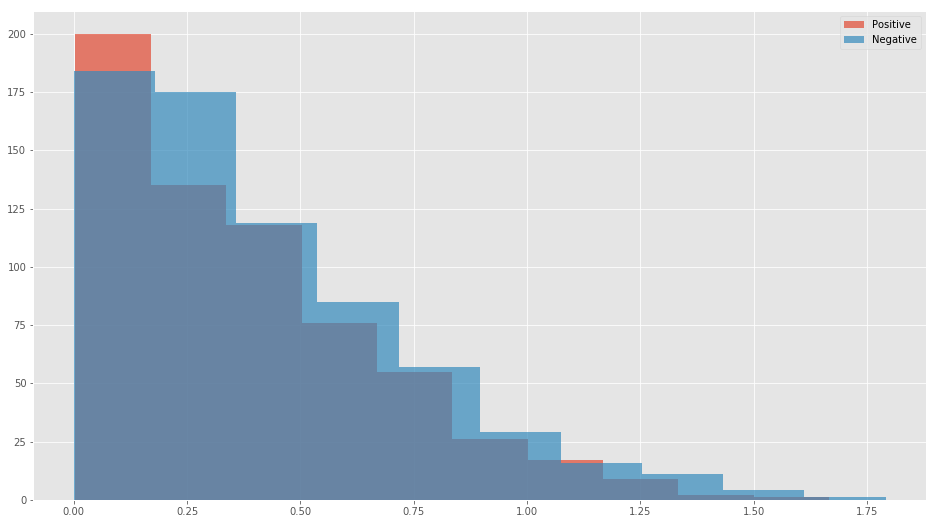

In [129]:
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(elem['delta_24_last'])

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(elem['delta_24_last'])

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

Still not very good. What about the maximum or average between these 3 features

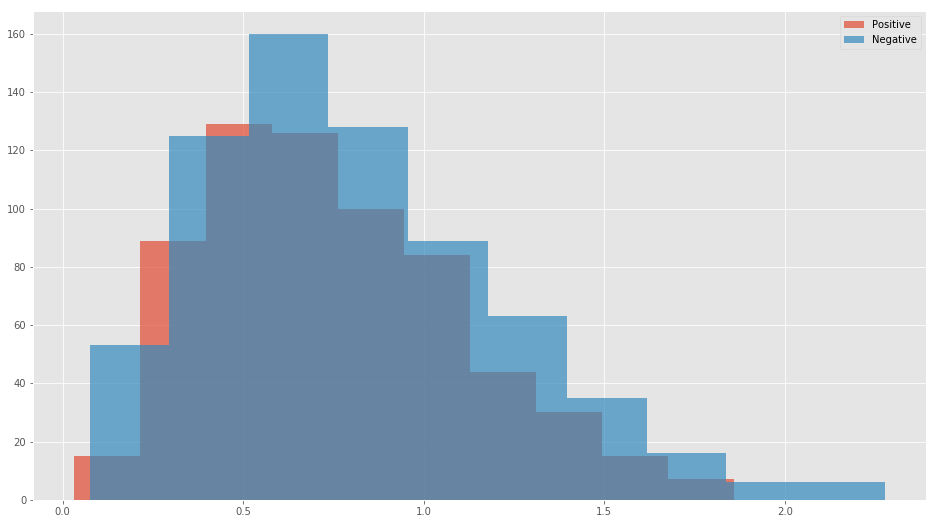

In [130]:
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(max(elem['delta_0_10'], elem['delta_10_24'], elem['delta_24_last']))

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(max(elem['delta_0_10'], elem['delta_10_24'], elem['delta_24_last']))

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

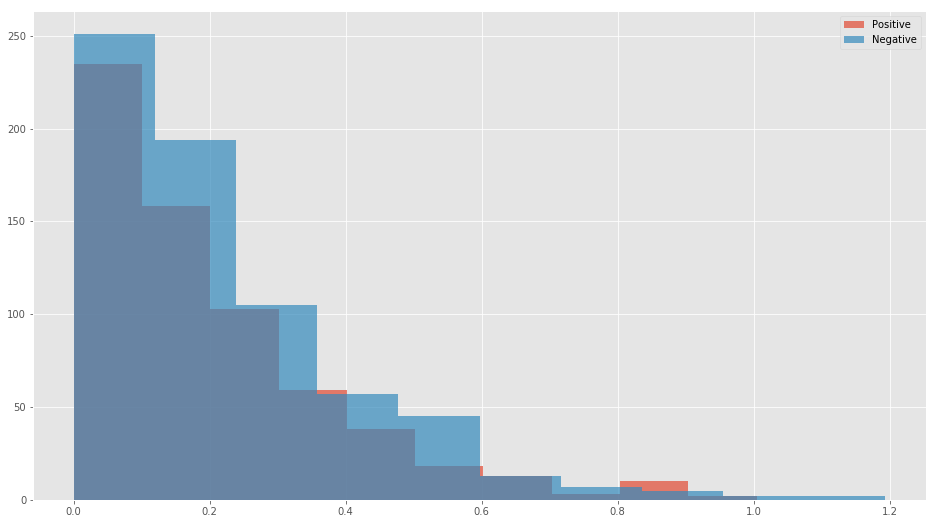

In [133]:
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(min(elem['delta_0_10'], elem['delta_10_24'], elem['delta_24_last']))

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(min(elem['delta_0_10'], elem['delta_10_24'], elem['delta_24_last']))

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

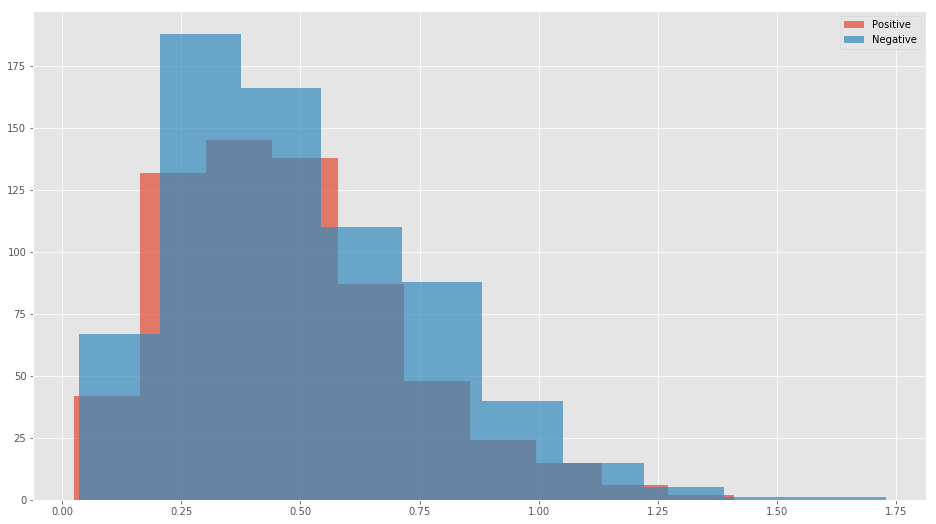

In [134]:
import numpy as np
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(np.mean((elem['delta_0_10'], elem['delta_10_24'], elem['delta_24_last'])))

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(np.mean((elem['delta_0_10'], elem['delta_10_24'], elem['delta_24_last'])))

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

Let's try to use another features on these frames, such as mean and variance

In [136]:
statistics_by_pos_sample = []
for sample_arr in y_pos_by_sample:
    stats = {}
    
    if len(sample_arr) > 0:
        stats['mean_0_10'] = np.mean(sample_arr[0:11])
        stats['std_0_10'] = np.std(sample_arr[0:11])
        stats['mean_10_24'] = np.mean(sample_arr[10:25])
        stats['std_10_24'] = np.std(sample_arr[10:25])
        stats['mean_24_last'] = np.mean(sample_arr[24:])
        stats['std_24_last'] = np.std(sample_arr[24:])
        statistics_by_pos_sample.append(stats)
    

In [137]:
statistics_by_neg_sample = []
for sample_arr in y_neg_by_sample:
    stats = {}
    
    if len(sample_arr) > 0:
        stats['mean_0_10'] = np.mean(sample_arr[0:11])
        stats['std_0_10'] = np.std(sample_arr[0:11])
        stats['mean_10_24'] = np.mean(sample_arr[10:25])
        stats['std_10_24'] = np.std(sample_arr[10:25])
        stats['mean_24_last'] = np.mean(sample_arr[24:])
        stats['std_24_last'] = np.std(sample_arr[24:])
        statistics_by_neg_sample.append(stats)

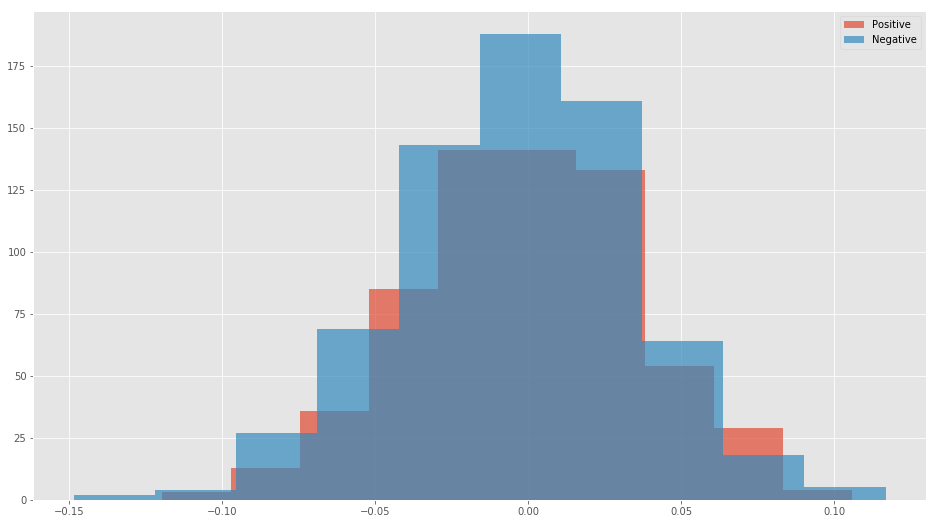

In [138]:
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(elem['mean_0_10'])

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(elem['mean_0_10'])

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

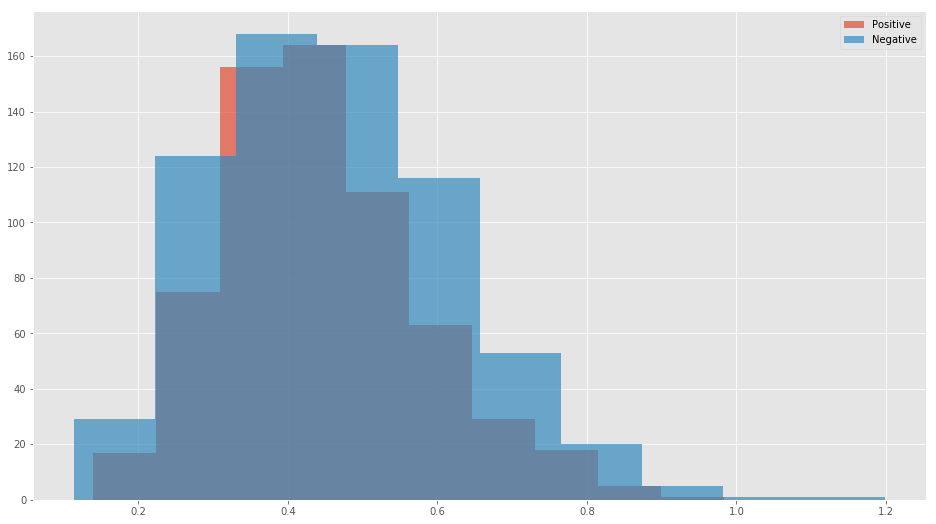

In [139]:
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(elem['std_0_10'])

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(elem['std_0_10'])

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

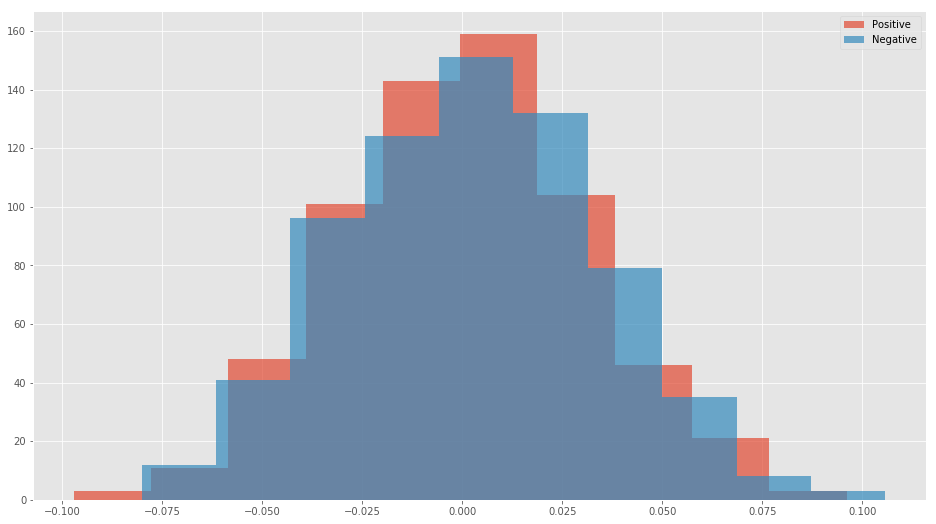

In [140]:
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(elem['mean_10_24'])

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(elem['mean_10_24'])

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

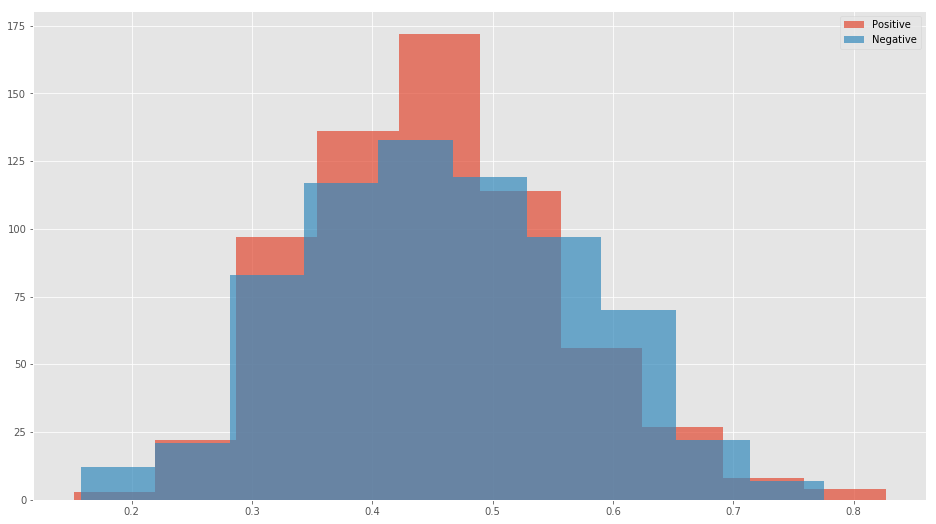

In [141]:
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(elem['std_10_24'])

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(elem['std_10_24'])

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

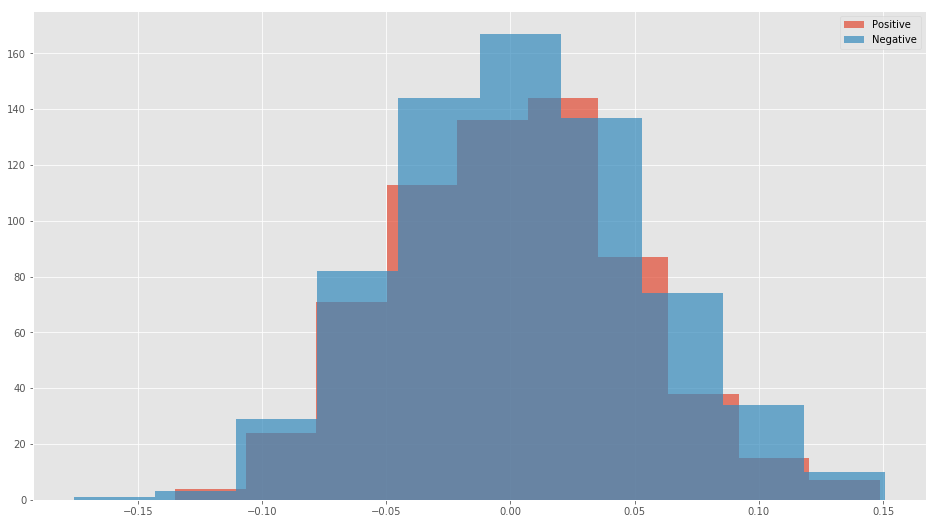

In [142]:
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(elem['mean_24_last'])

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(elem['mean_24_last'])

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

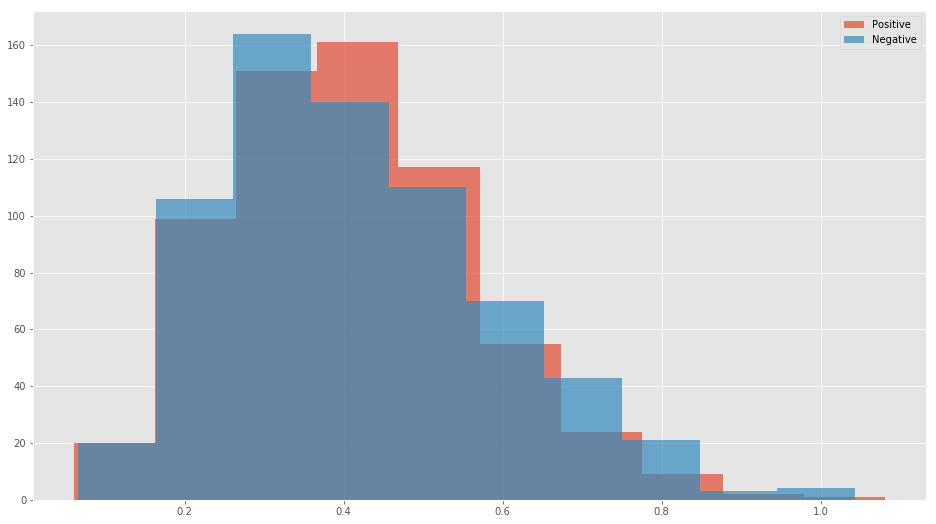

In [143]:
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(elem['std_24_last'])

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(elem['std_24_last'])

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

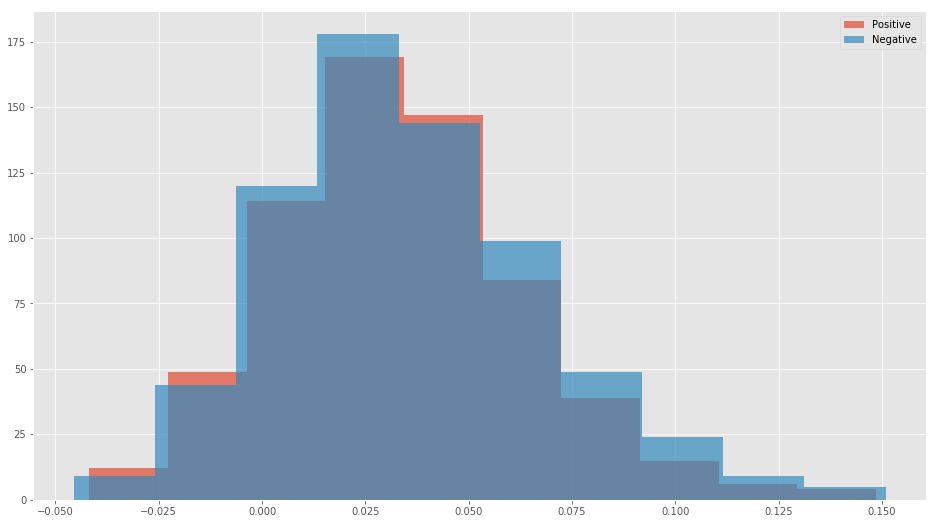

In [144]:
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(max(elem['mean_0_10'], elem['mean_10_24'], elem['mean_24_last']))

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(max(elem['mean_0_10'], elem['mean_10_24'], elem['mean_24_last']))

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

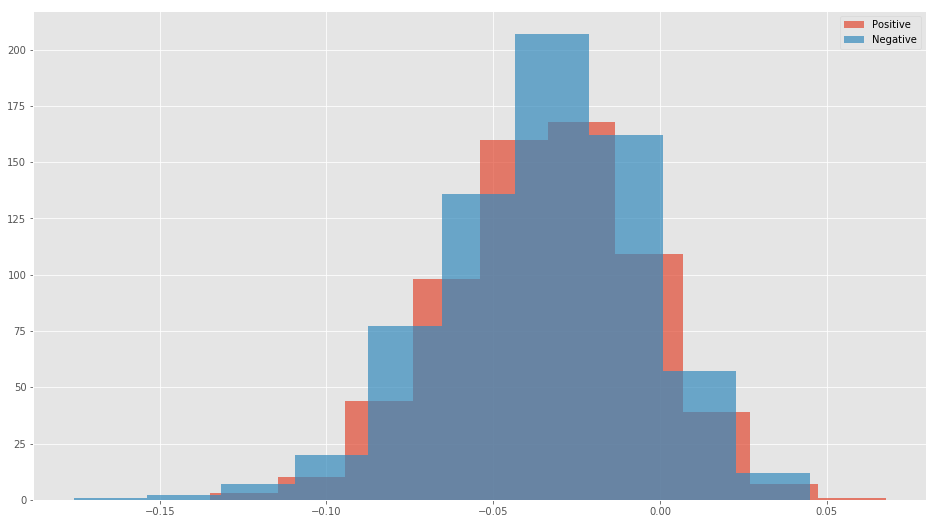

In [145]:
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(min(elem['mean_0_10'], elem['mean_10_24'], elem['mean_24_last']))

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(min(elem['mean_0_10'], elem['mean_10_24'], elem['mean_24_last']))

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

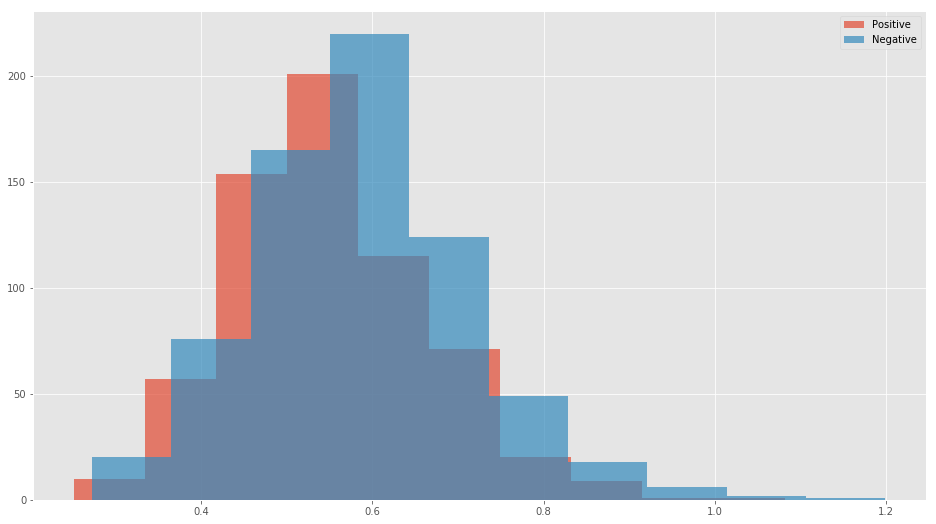

In [147]:
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(max(elem['std_0_10'], elem['std_10_24'], elem['std_24_last']))

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(max(elem['std_0_10'], elem['std_10_24'], elem['std_24_last']))

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

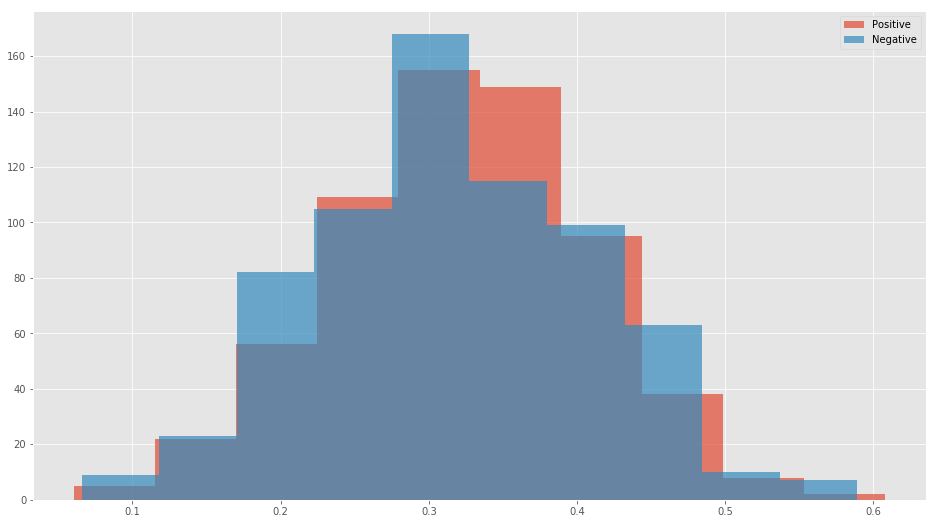

In [148]:
y_pos = []
for elem in statistics_by_pos_sample:
    y_pos.append(min(elem['std_0_10'], elem['std_10_24'], elem['std_24_last']))

y_neg = []
for elem in statistics_by_neg_sample:
    y_neg.append(min(elem['std_0_10'], elem['std_10_24'], elem['std_24_last']))

plt.figure(figsize=(16,9))
plt.hist(y_pos, alpha=0.7)
plt.hist(y_neg, alpha=0.7)
plt.legend(['Positive', 'Negative'])
plt.show()

We can see some small improvements, but it's still not so good at this moment. Let's try to create the decision rule based on some borders

In [152]:
cnt_correct = 0
for elem in statistics_by_pos_sample:
    if (min(elem['std_0_10'], elem['std_10_24'], elem['std_24_last']) > 0.35) and (max(elem['std_0_10'], elem['std_10_24'], elem['std_24_last']) < 0.6):
            cnt_correct+=1

cnt_incorrect = 0        
for elem in statistics_by_neg_sample:
    if (min(elem['std_0_10'], elem['std_10_24'], elem['std_24_last']) > 0.35) and (max(elem['std_0_10'], elem['std_10_24'], elem['std_24_last']) < 0.6):
            cnt_incorrect+=1
            
print("Accuracy: {}".format((len(statistics_by_neg_sample)-cnt_incorrect + cnt_correct)/(len(statistics_by_neg_sample)+len(statistics_by_pos_sample))))
print("Precision (for class 1): {}".format(cnt_correct/(cnt_correct+cnt_incorrect)))
print("Recall (for calss 1): {}".format(cnt_correct/(len(statistics_by_pos_sample))))

Accuracy: 0.543939393939394
Precision (for class 1): 0.5606557377049181
Recall (for calss 1): 0.2676056338028169


So, it's slightly better than random in terms of accuracy =)

Let's try to consider one more parameter: std_24_last

In [153]:
cnt_correct = 0
for elem in statistics_by_pos_sample:
    if (min(elem['std_0_10'], elem['std_10_24'], elem['std_24_last']) > 0.35) and (max(elem['std_0_10'], elem['std_10_24'], elem['std_24_last']) < 0.6) and (elem['std_24_last'] > 0.4):
            cnt_correct+=1

cnt_incorrect = 0        
for elem in statistics_by_neg_sample:
    if (min(elem['std_0_10'], elem['std_10_24'], elem['std_24_last']) > 0.35) and (max(elem['std_0_10'], elem['std_10_24'], elem['std_24_last']) < 0.6) and (elem['std_24_last'] > 0.4):
            cnt_incorrect+=1
            
print("Accuracy: {}".format((len(statistics_by_neg_sample)-cnt_incorrect + cnt_correct)/(len(statistics_by_neg_sample)+len(statistics_by_pos_sample))))
print("Precision (for class 1): {}".format(cnt_correct/(cnt_correct+cnt_incorrect)))
print("Recall (for calss 1): {}".format(cnt_correct/(len(statistics_by_pos_sample))))

Accuracy: 0.5257575757575758
Precision (for class 1): 0.5278969957081545
Recall (for calss 1): 0.19248826291079812


In [160]:
from scipy.fftpack import fft

Well... it became worse

Let's try something different. We mentioned earlier that negative class in general has more high-frequency components. Let's try to draw spectres of some sample signals again

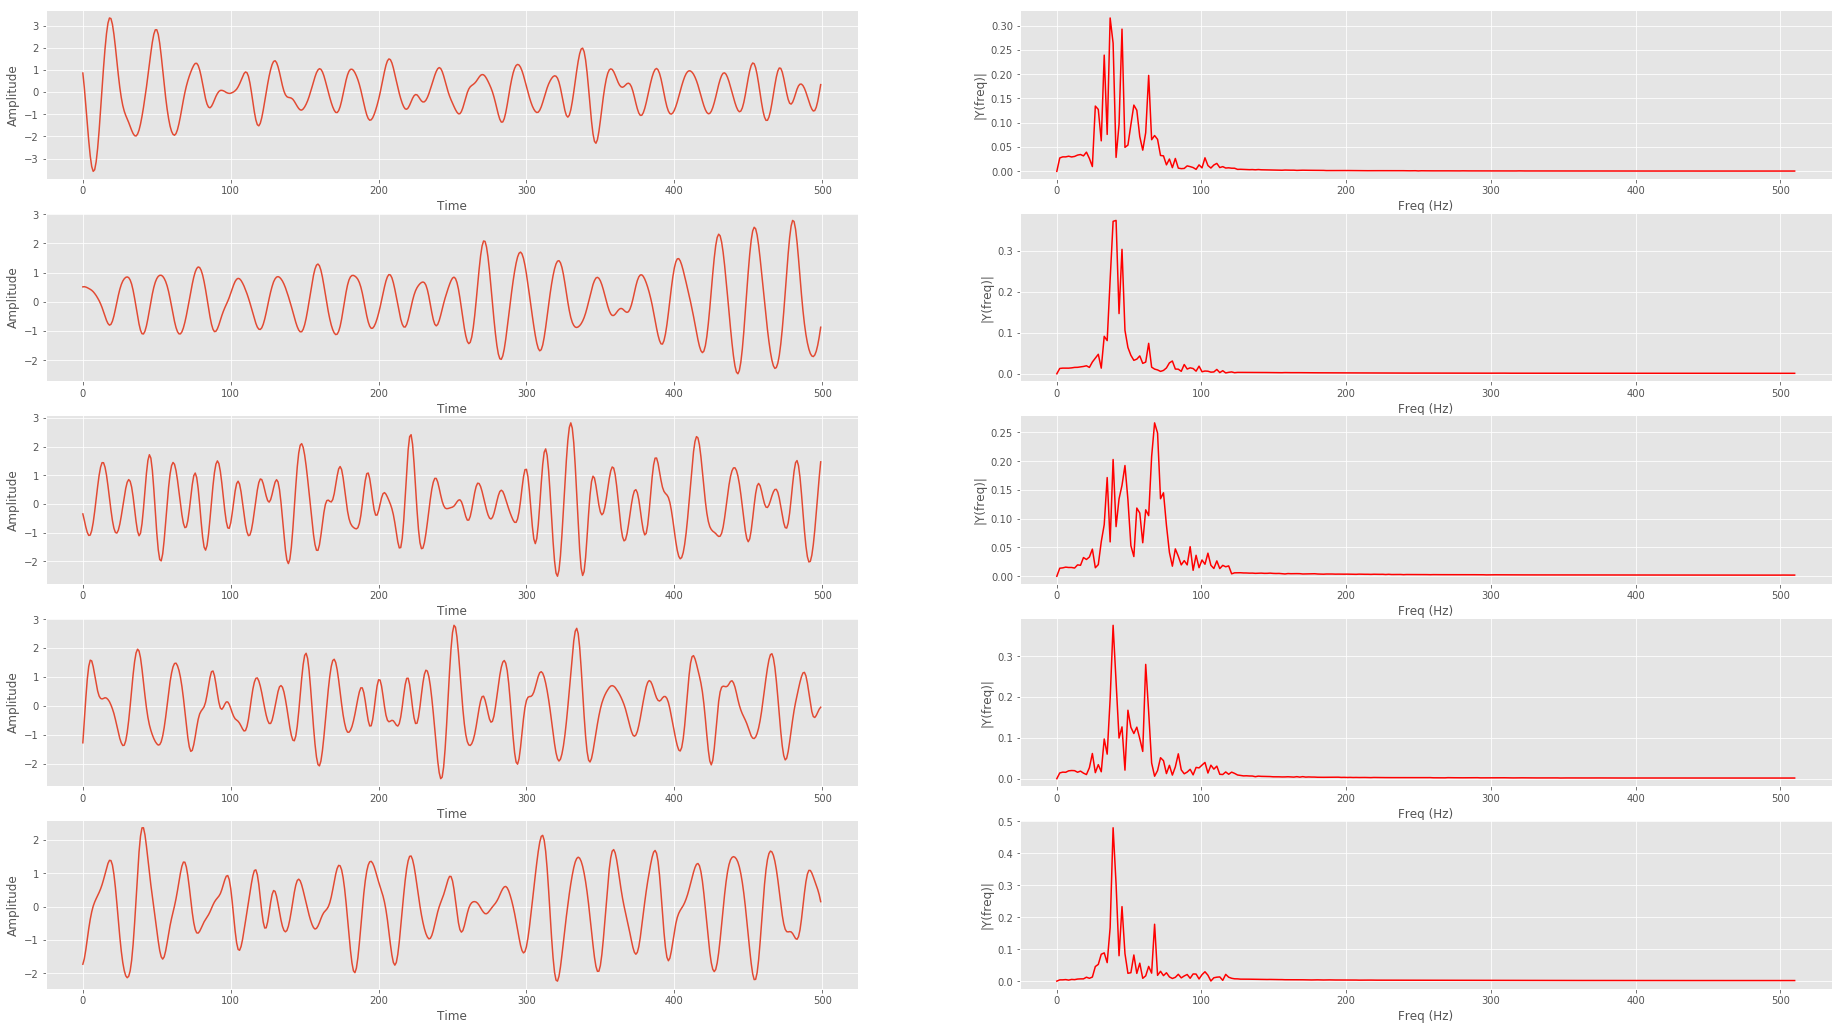

In [176]:
def getSpectrum(y,Fs):
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range

    Y = fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    return frq, Y


def plotSpectrum(y,Fs):
    frq, Y = getSpectrum(y,Fs)
    plt.plot(frq,abs(Y),'r') # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')

plt.figure(figsize=(32,18))

Fs=1024.0
idx = 1
while idx <= 10:
    y = []
    for elem in pos_samples.iloc[random.randint(a=0,b=pos_samples.shape[0]-1)].drop('Target'):
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector

    
    plt.subplot(5,2,idx)
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(5,2,idx+1)
    plotSpectrum(y,Fs)
    idx += 2

plt.show()

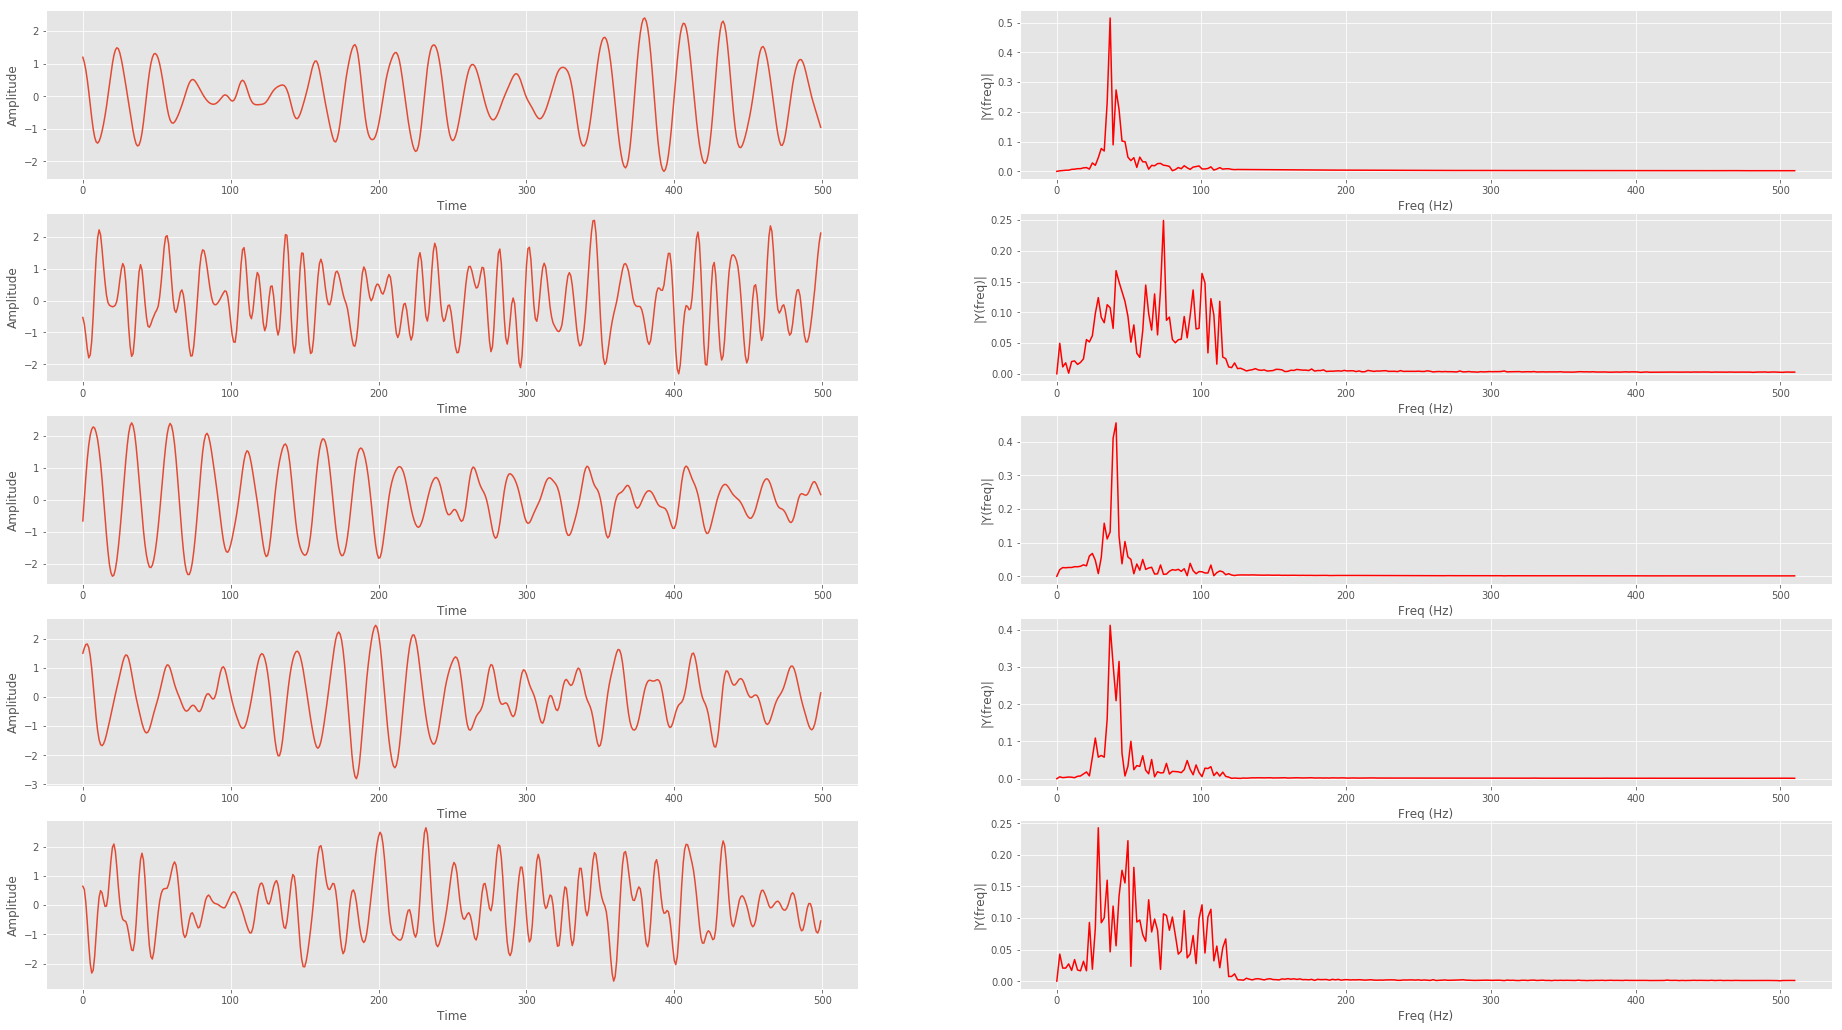

In [177]:
plt.figure(figsize=(32,18))

Fs=1024.0
idx = 1
while idx <= 10:
    y = []
    for elem in neg_samples.iloc[random.randint(a=0,b=neg_samples.shape[0]-1)].drop('Target'):
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector

    
    plt.subplot(5,2,idx)
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(5,2,idx+1)
    plotSpectrum(y,Fs)
    idx += 2

plt.show()

So we can see that feature like presence of the strong frequency components after 100Hz can be a good feature. Let's try it

In [213]:
thr = 100
for j, row in pos_samples[:5].iterrows():
    row = row.drop('Target')
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    print(summary)

0.7524401100383098
0.5501554179289545
0.540410232571954
0.7916093989855876
0.7817186554774631


In [214]:
thr = 100
for j, row in neg_samples[:5].iterrows():
    row = row.drop('Target')
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    print(summary)

0.9624013985676092
1.105880476802037
1.5581247093736519
0.5825589018237756
0.7822365453045182


Let's try to find the optimal value for summary threshold

In [215]:
summary_pos = []
for j, row in pos_samples.iterrows():
    row = row.drop('Target')
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    summary_pos.append(summary)
    
summary_neg = []
for j, row in neg_samples.iterrows():
    row = row.drop('Target')
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    summary_neg.append(summary)

In [218]:
net = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4]
precisions = []
recalls = []
accuracies = []
for n in net:
    tp = len([elem for elem in summary_pos if elem < n])
    fp = len([elem for elem in summary_neg if elem < n])
    fn = len([elem for elem in summary_pos if elem >= n]) # len(summary_pos) - tp
    precisions.append(tp/(tp+fp))
    recalls.append(tp/(tp+fn))
    accuracies.append((tp+len([elem for elem in summary_neg if elem >= n]))/(len(summary_neg)+len(summary_pos)))

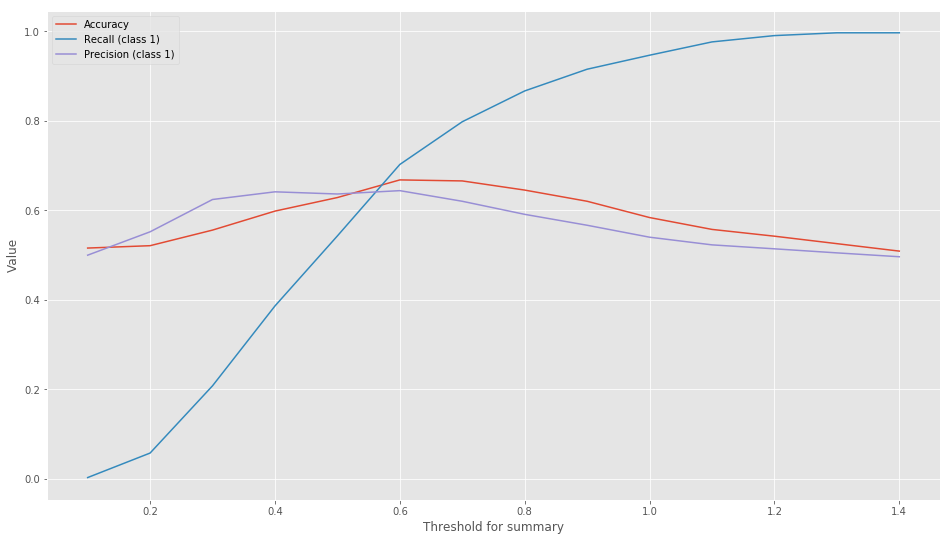

In [219]:
plt.figure(figsize=(16,9))
plt.plot(net, accuracies)
plt.plot(net, recalls)
plt.plot(net, precisions)
plt.xlabel('Threshold for summary')
plt.ylabel('Value')
plt.legend(['Accuracy', 'Recall (class 1)', 'Precision (class 1)'])
plt.show()

Let's take the value 0.6 (max accuracy)

And so we'll get...

In [220]:
net.index(0.6)

5

In [221]:
print("Accuracy: {}".format(accuracies[5]))
print("Recall (class 1): {}".format(recalls[5]))
print("Precision (class 1): {}".format(precisions[5]))

Accuracy: 0.6681818181818182
Recall (class 1): 0.702660406885759
Precision (class 1): 0.6441893830703013


So the final rule is

**if the summary of amplitudes in spectre (fft) after 100HZ is more than 0.6 -> class -1 otherwise class 1**

## The part that didn't work

Let's try to combine both of the insights. We'll try to apply fft for 3 zones of the signal: 0-150, 150-360, 360-500. At first we'll try to classify by three zones separetly and after that we'll develop the common rule

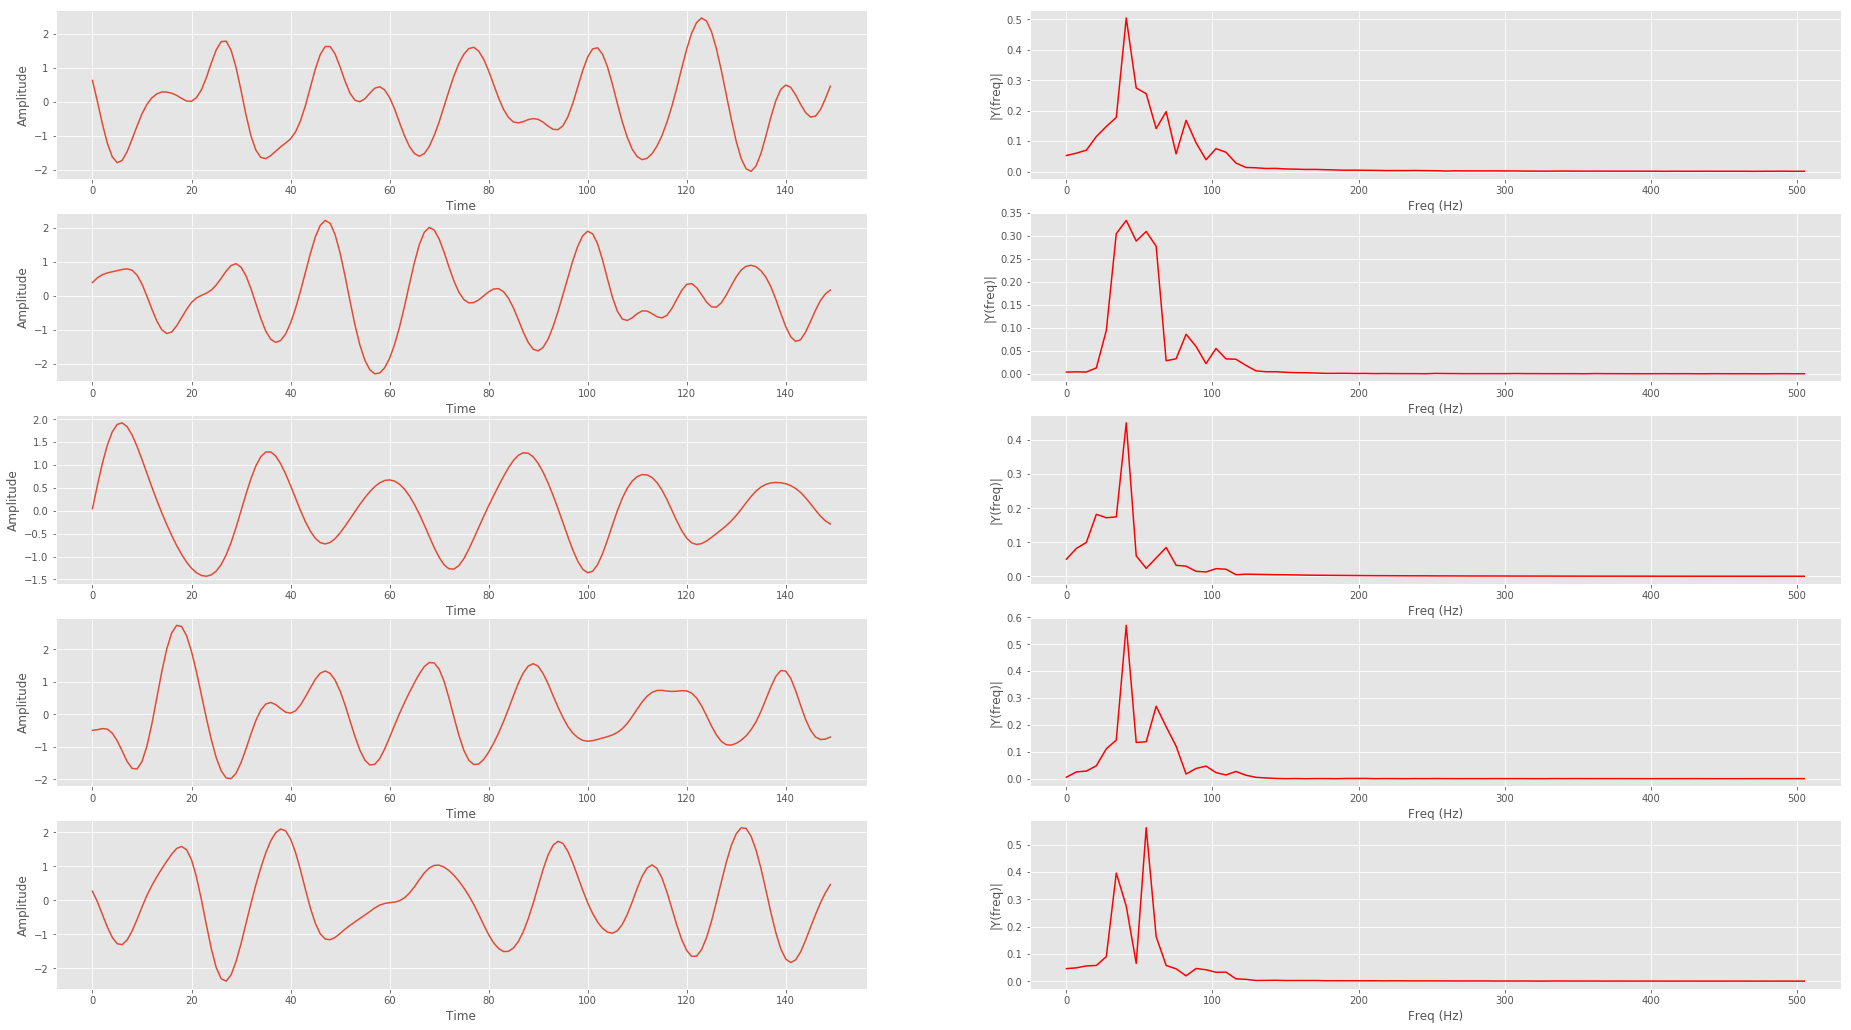

In [224]:
plt.figure(figsize=(32,18))

Fs=1024.0
idx = 1
while idx <= 10:
    y = []
    for elem in pos_samples.iloc[random.randint(a=0,b=pos_samples.shape[0]-1)].drop('Target')[:150]:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector

    
    plt.subplot(5,2,idx)
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(5,2,idx+1)
    plotSpectrum(y,Fs)
    idx += 2

plt.show()

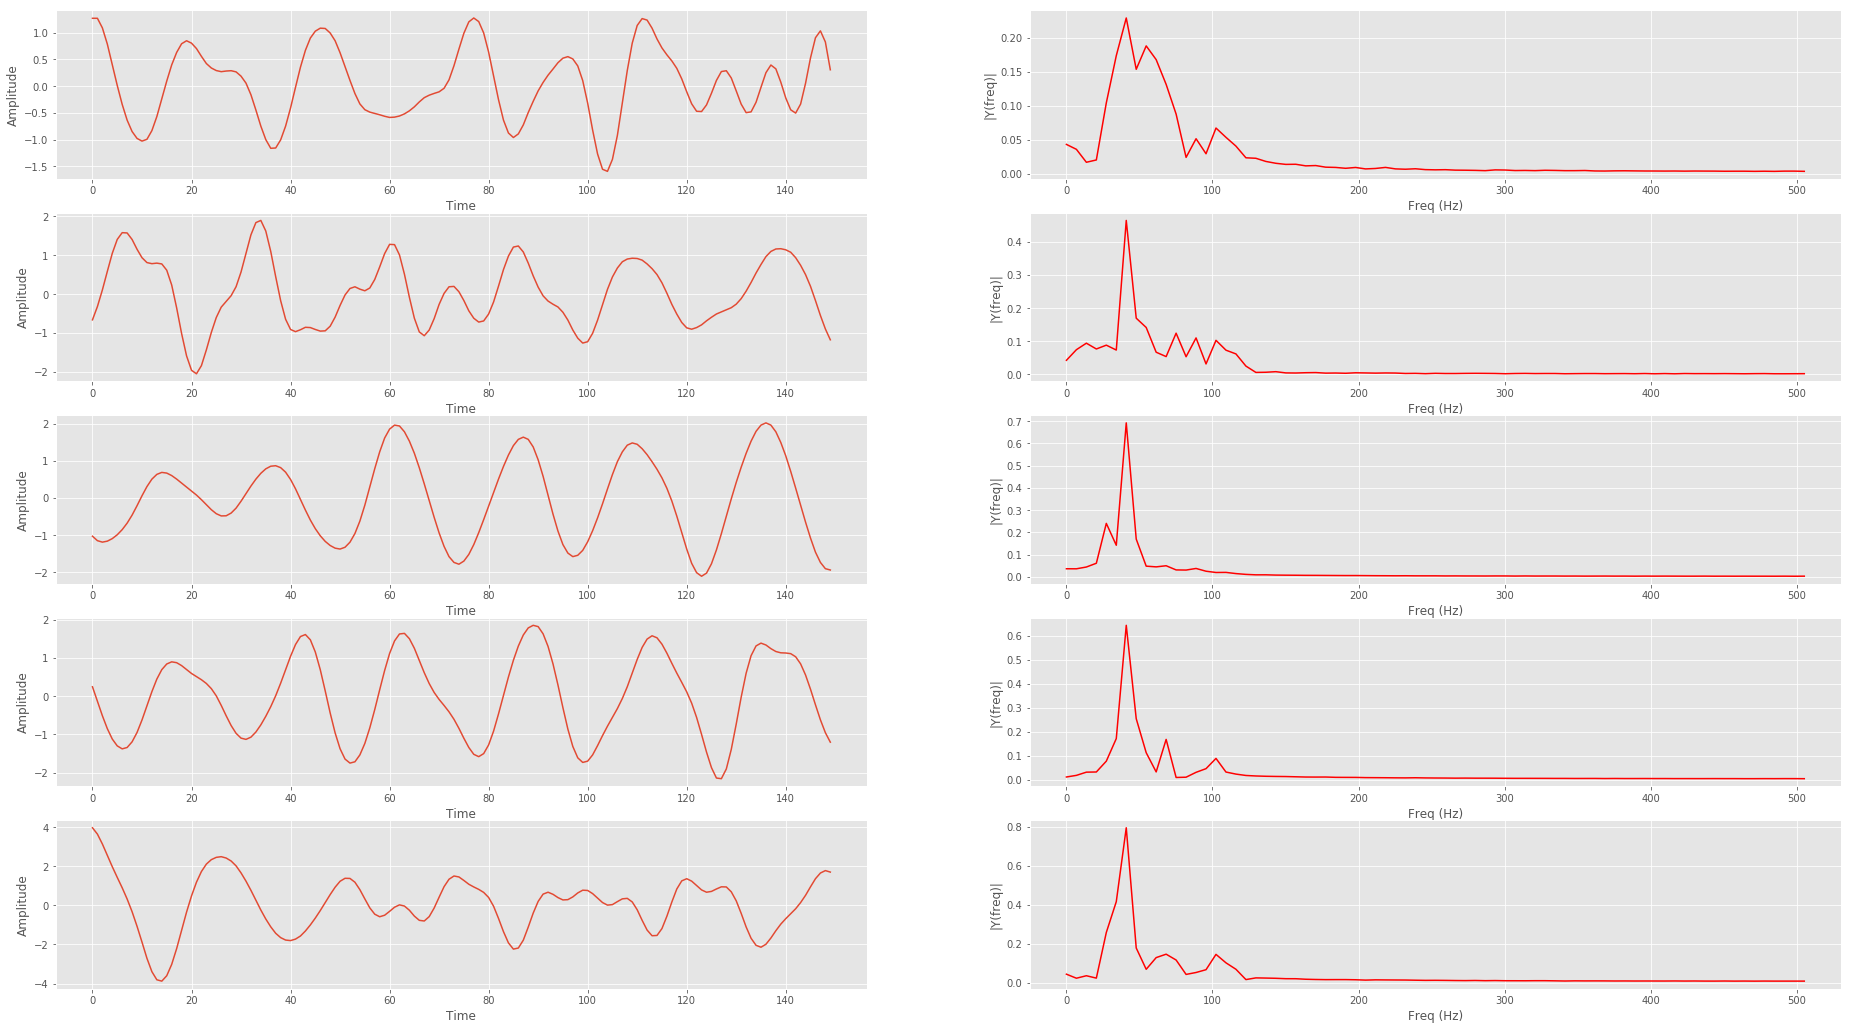

In [225]:
plt.figure(figsize=(32,18))

Fs=1024.0
idx = 1
while idx <= 10:
    y = []
    for elem in neg_samples.iloc[random.randint(a=0,b=neg_samples.shape[0]-1)].drop('Target')[:150]:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector

    
    plt.subplot(5,2,idx)
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(5,2,idx+1)
    plotSpectrum(y,Fs)
    idx += 2

plt.show()

In [232]:
thr = 80
for j, row in pos_samples[:5].iterrows():
    row = row.drop('Target')[:150]
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    print(summary)

0.6214742289769266
0.539558679613689
0.3468292880709172
0.7114553216391014
0.29070086776687915


In [233]:
for j, row in neg_samples[:5].iterrows():
    row = row.drop('Target')[:150]
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    print(summary)

1.1004286050750285
0.8277864721704278
0.4853071648268734
0.4704327525536421
1.2227646254033757


In [235]:
summary_pos_150 = []
for j, row in pos_samples.iterrows():
    row = row.drop('Target')[:150]
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    summary_pos_150.append(summary)
    
summary_neg_150 = []
for j, row in neg_samples.iterrows():
    row = row.drop('Target')[:150]
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    summary_neg_150.append(summary)

In [236]:
net = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4]
precisions = []
recalls = []
accuracies = []
for n in net:
    tp = len([elem for elem in summary_pos_150 if elem < n])
    fp = len([elem for elem in summary_neg_150 if elem < n])
    fn = len([elem for elem in summary_pos_150 if elem >= n]) # len(summary_pos) - tp
    precisions.append(tp/(tp+fp))
    recalls.append(tp/(tp+fn))
    accuracies.append((tp+len([elem for elem in summary_neg_150 if elem >= n]))/(len(summary_neg_150)+len(summary_pos_150)))

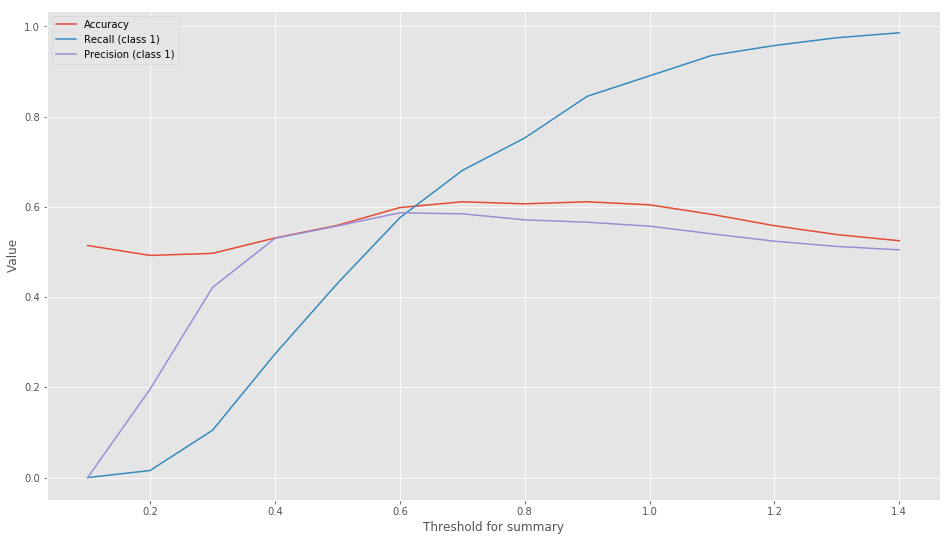

In [237]:
plt.figure(figsize=(16,9))
plt.plot(net, accuracies)
plt.plot(net, recalls)
plt.plot(net, precisions)
plt.xlabel('Threshold for summary')
plt.ylabel('Value')
plt.legend(['Accuracy', 'Recall (class 1)', 'Precision (class 1)'])
plt.show()

In [238]:
net.index(0.9)

8

In [239]:
print("Accuracy: {}".format(accuracies[8]))
print("Recall (class 1): {}".format(recalls[8]))
print("Precision (class 1): {}".format(precisions[8]))

Accuracy: 0.6113636363636363
Recall (class 1): 0.8450704225352113
Precision (class 1): 0.5660377358490566


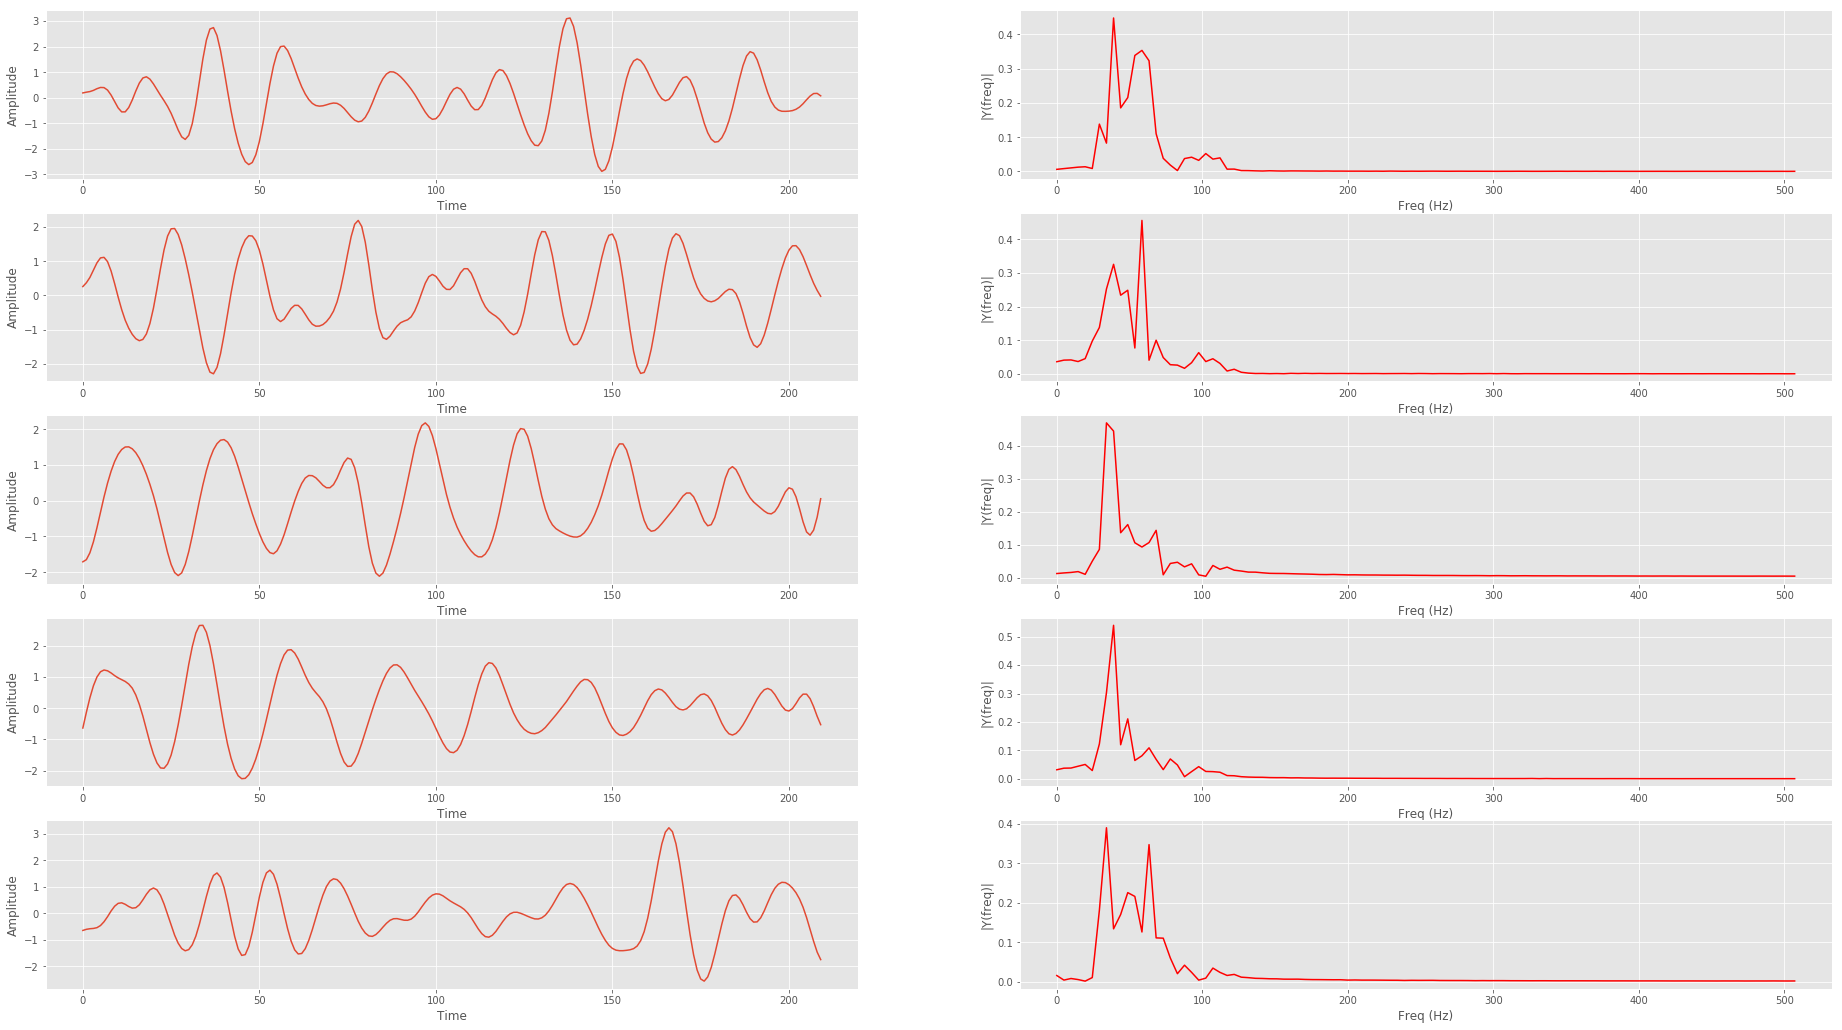

In [226]:
plt.figure(figsize=(32,18))

Fs=1024.0
idx = 1
while idx <= 10:
    y = []
    for elem in pos_samples.iloc[random.randint(a=0,b=pos_samples.shape[0]-1)].drop('Target')[150:360]:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector

    
    plt.subplot(5,2,idx)
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(5,2,idx+1)
    plotSpectrum(y,Fs)
    idx += 2

plt.show()

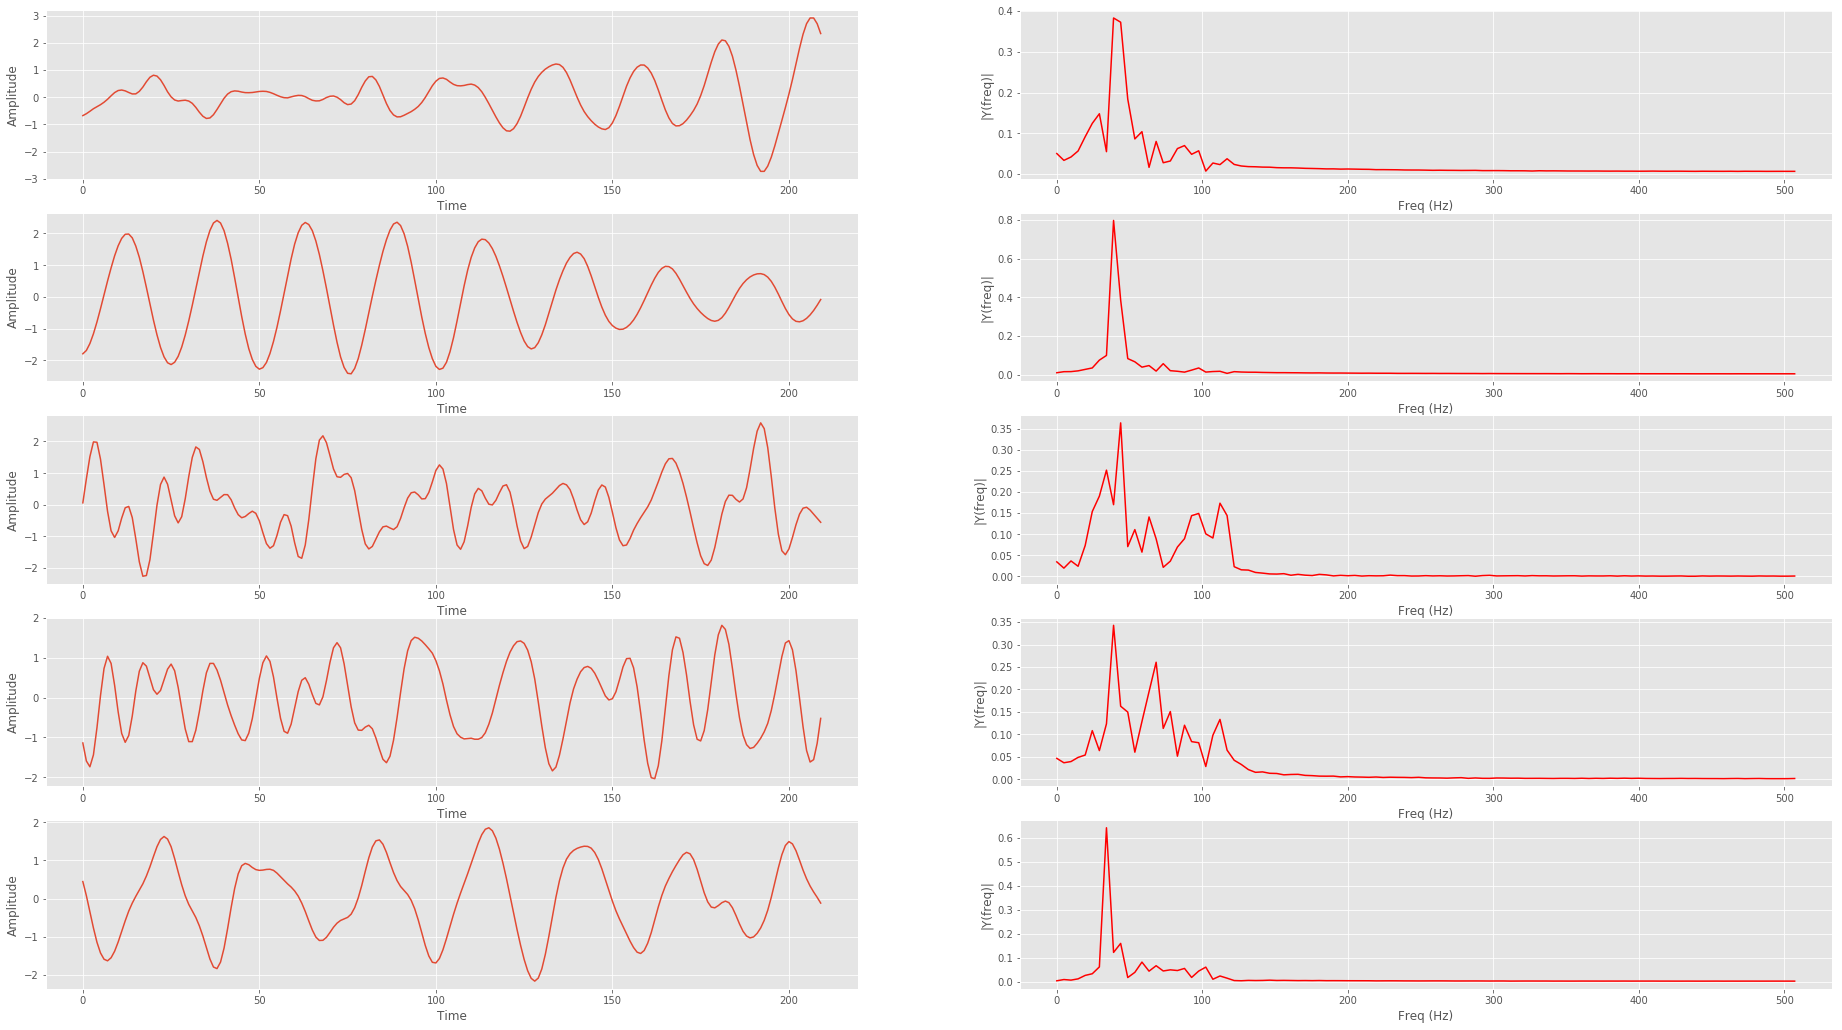

In [227]:
plt.figure(figsize=(32,18))

Fs=1024.0
idx = 1
while idx <= 10:
    y = []
    for elem in neg_samples.iloc[random.randint(a=0,b=neg_samples.shape[0]-1)].drop('Target')[150:360]:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector

    
    plt.subplot(5,2,idx)
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(5,2,idx+1)
    plotSpectrum(y,Fs)
    idx += 2

plt.show()

In [240]:
thr = 60
for j, row in pos_samples[:5].iterrows():
    row = row.drop('Target')[150:360]
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    print(summary)

0.8497394259127785
0.5201064125604136
1.385695177595961
0.35609420797180025
0.3193774677318244


In [241]:
for j, row in neg_samples[:5].iterrows():
    row = row.drop('Target')[150:360]
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    print(summary)

1.854481428828293
2.234748267762072
0.37961682199368496
1.1871639524680027
2.1727316307615747


In [242]:
summary_pos_150_360 = []
for j, row in pos_samples.iterrows():
    row = row.drop('Target')[150:360]
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    summary_pos_150_360.append(summary)
    
summary_neg_150_360 = []
for j, row in neg_samples.iterrows():
    row = row.drop('Target')[150:360]
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    summary_neg_150_360.append(summary)

In [245]:
net = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7]
precisions = []
recalls = []
accuracies = []
for n in net:
    tp = len([elem for elem in summary_pos_150_360 if elem < n])
    fp = len([elem for elem in summary_neg_150_360 if elem < n])
    fn = len([elem for elem in summary_pos_150_360 if elem >= n]) # len(summary_pos) - tp
    precisions.append(tp/(tp+fp))
    recalls.append(tp/(tp+fn))
    accuracies.append((tp+len([elem for elem in summary_neg_150_360 if elem >= n]))/(len(summary_neg_150_360)+len(summary_pos_150_360)))

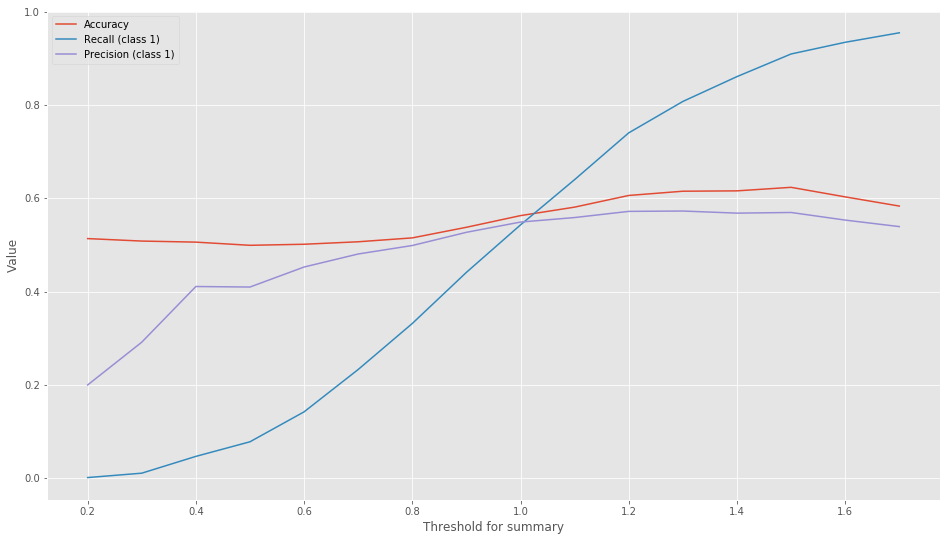

In [246]:
plt.figure(figsize=(16,9))
plt.plot(net, accuracies)
plt.plot(net, recalls)
plt.plot(net, precisions)
plt.xlabel('Threshold for summary')
plt.ylabel('Value')
plt.legend(['Accuracy', 'Recall (class 1)', 'Precision (class 1)'])
plt.show()

In [247]:
net.index(1.5)

13

In [248]:
print("Accuracy: {}".format(accuracies[13]))
print("Recall (class 1): {}".format(recalls[13]))
print("Precision (class 1): {}".format(precisions[13]))

Accuracy: 0.6234848484848485
Recall (class 1): 0.9092331768388107
Precision (class 1): 0.5696078431372549


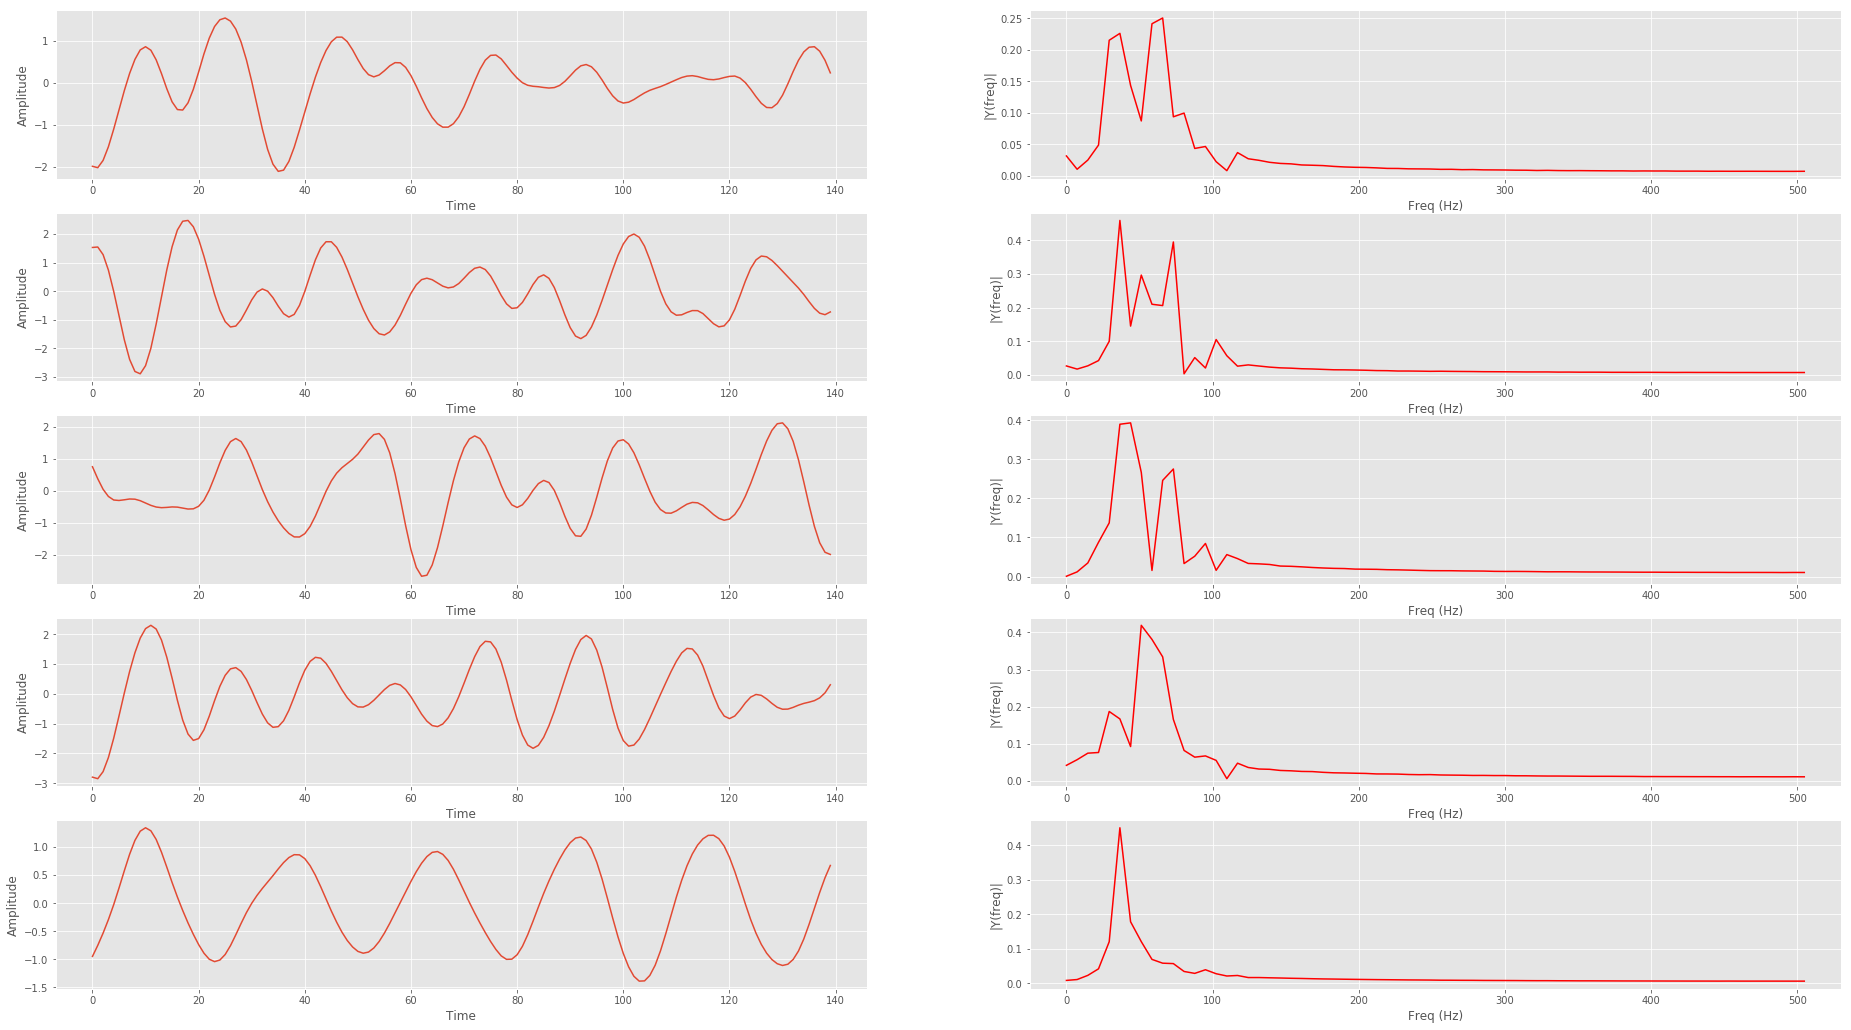

In [228]:
plt.figure(figsize=(32,18))

Fs=1024.0
idx = 1
while idx <= 10:
    y = []
    for elem in pos_samples.iloc[random.randint(a=0,b=pos_samples.shape[0]-1)].drop('Target')[360:]:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector

    
    plt.subplot(5,2,idx)
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(5,2,idx+1)
    plotSpectrum(y,Fs)
    idx += 2

plt.show()

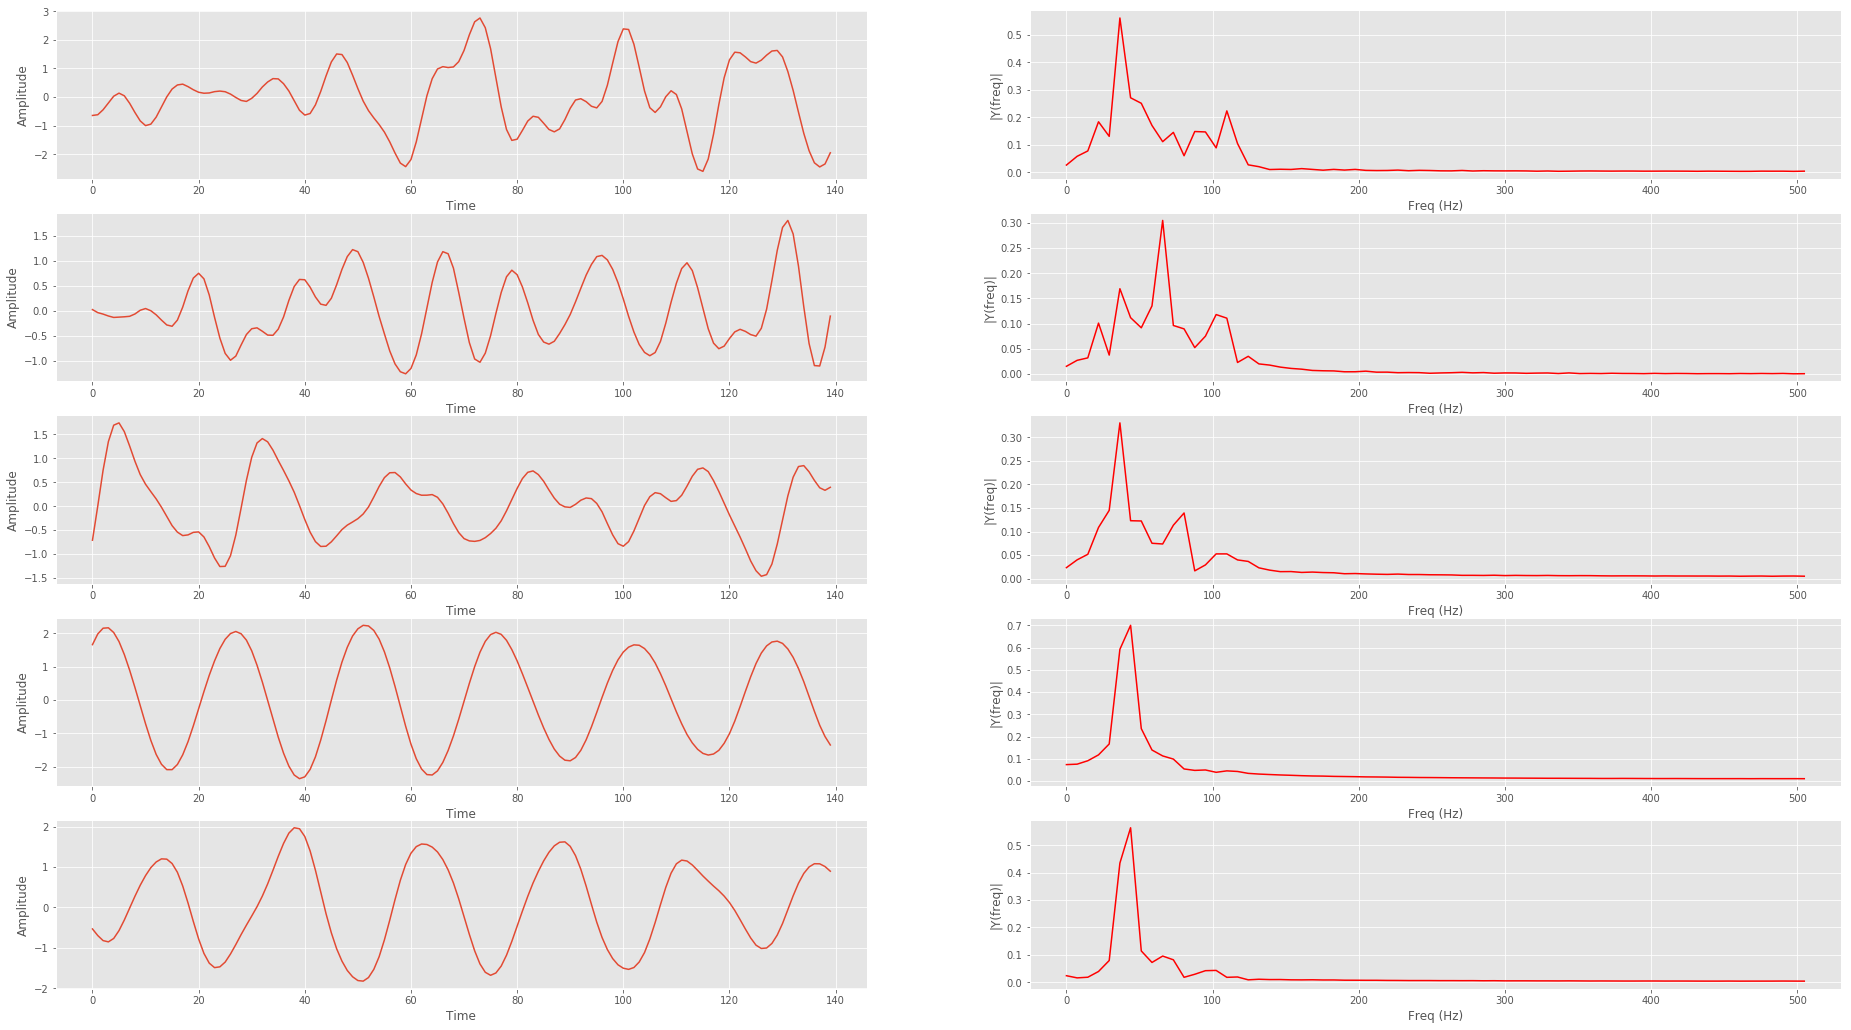

In [229]:
plt.figure(figsize=(32,18))

Fs=1024.0
idx = 1
while idx <= 10:
    y = []
    for elem in neg_samples.iloc[random.randint(a=0,b=neg_samples.shape[0]-1)].drop('Target')[360:]:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector

    
    plt.subplot(5,2,idx)
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(5,2,idx+1)
    plotSpectrum(y,Fs)
    idx += 2

plt.show()

In [249]:
thr = 50
for j, row in pos_samples[:5].iterrows():
    row = row.drop('Target')[360:]
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    print(summary)

1.0037105860123985
1.4062039087547096
2.0856192158175344
0.5979296038877592
1.9281833779429243


In [250]:
for j, row in neg_samples[:5].iterrows():
    row = row.drop('Target')[360:]
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    print(summary)

2.150756052205394
2.9527500630518526
2.491800506474521
0.7275632584090047
2.0115972577520216


In [251]:
summary_pos_360_ = []
for j, row in pos_samples.iterrows():
    row = row.drop('Target')[360:]
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    summary_pos_360_.append(summary)
    
summary_neg_360_ = []
for j, row in neg_samples.iterrows():
    row = row.drop('Target')[360:]
    y = []
    for elem in row:
        y.append(elem)
    t = np.arange(0,len(y),1) # time vector
    frq, Y = getSpectrum(y,Fs)
    Y_abs = abs(Y)
    summary = 0
    for i in range(len(frq)):
        if frq[i] >= thr:
            summary += Y_abs[i]
    summary_neg_360_.append(summary)

In [252]:
net = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9]
precisions = []
recalls = []
accuracies = []
for n in net:
    tp = len([elem for elem in summary_pos_360_ if elem < n])
    fp = len([elem for elem in summary_neg_360_ if elem < n])
    fn = len([elem for elem in summary_pos_360_ if elem >= n]) # len(summary_pos) - tp
    precisions.append(tp/(tp+fp))
    recalls.append(tp/(tp+fn))
    accuracies.append((tp+len([elem for elem in summary_neg_360_ if elem >= n]))/(len(summary_neg_360_)+len(summary_pos_360_)))

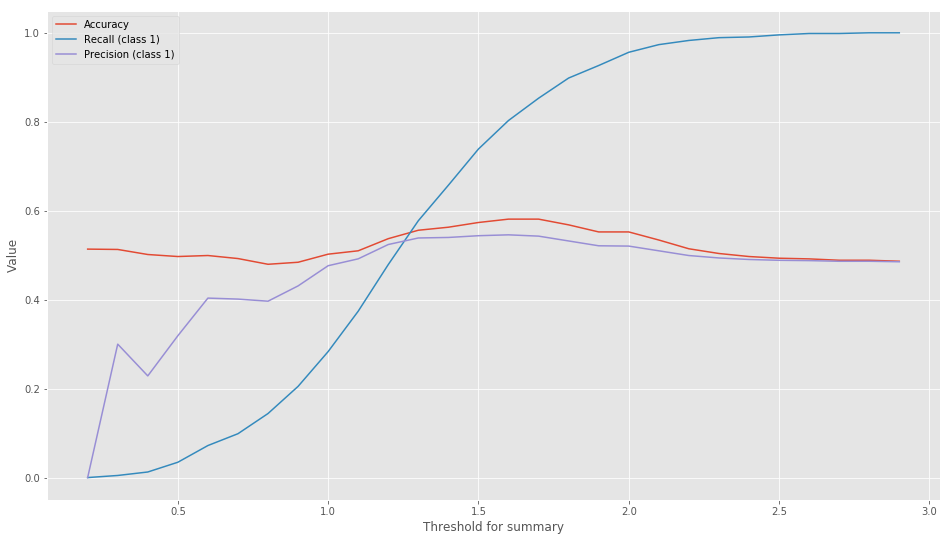

In [253]:
plt.figure(figsize=(16,9))
plt.plot(net, accuracies)
plt.plot(net, recalls)
plt.plot(net, precisions)
plt.xlabel('Threshold for summary')
plt.ylabel('Value')
plt.legend(['Accuracy', 'Recall (class 1)', 'Precision (class 1)'])
plt.show()

In [254]:
net.index(1.6)

14

In [255]:
print("Accuracy: {}".format(accuracies[14]))
print("Recall (class 1): {}".format(recalls[14]))
print("Precision (class 1): {}".format(precisions[14]))

Accuracy: 0.581060606060606
Recall (class 1): 0.8028169014084507
Precision (class 1): 0.5457446808510639


In [266]:
precisions = []
recalls = []
accuracies = []
tp = len([1 for idx in range(len(summary_pos)) if (summary_pos_150[idx] < 0.9) and (summary_pos_150_360[idx] < 1.5) and (summary_pos_360_[idx] < 1.6)])
fp = len([1 for idx in range(len(summary_neg)) if (summary_neg_150[idx] < 0.9) and (summary_neg_150_360[idx] < 1.5) and (summary_neg_360_[idx] < 1.6)])
fn = len([1 for idx in range(len(summary_pos)) if (summary_pos_150[idx] >= 0.9) and (summary_pos_150_360[idx] >= 1.5) and (summary_pos_360_[idx] >= 1.6)]) # len(summary_pos) - tp
print("Precision (class 1): {}".format((tp/(tp+fp))))
print("Recall (class 1): {}".format((tp/(tp+fn))))
print("Accuracy: {}".format((tp+len([1 for idx in range(len(summary_neg)) if (summary_neg_150[idx] >= 0.9) and (summary_neg_150_360[idx] >= 1.5) and (summary_neg_360_[idx] >= 1.6)]))/(len(summary_neg)+len(summary_pos))))

Precision (class 1): 0.5625
Recall (class 1): 0.9926470588235294
Accuracy: 0.4166666666666667


In [257]:
len(summary_pos)

639

In [258]:
len(summary_pos_150)

639

In [259]:
len(summary_pos_150_360)

639

In [260]:
len(summary_pos_360_)

639

In [261]:
len(summary_neg)

681

In [262]:
len(summary_neg_150)

681

In [263]:
len(summary_neg_150_360)

681

In [264]:
len(summary_neg_360_)

681